# Portfolio Optimization: Theory and practical Pitfalls

---

# Getting Started

In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.6f}'.format

In [245]:
df = pd.read_csv("stocks.csv", parse_dates = ["Date"], index_col = "Date")
df

,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT
Date,,,,,,,,
2017-07-03,35.875000,198.589996,107.459999,211.153839,92.750000,68.169998,23.507999,75.360001
2017-07-05,36.022499,201.809998,105.629997,210.384613,93.680000,69.080002,21.806000,75.320000
2017-07-06,35.682499,201.479996,103.349998,202.384613,93.379997,68.570000,20.588667,75.470001
2017-07-07,36.044998,202.369995,103.320000,201.153839,93.849998,69.459999,20.881332,75.330002
2017-07-10,36.264999,203.960007,103.589996,200.307693,93.190002,69.980003,21.070000,73.230003
...,...,...,...,...,...,...,...,...
2022-06-24,141.660004,141.529999,97.779999,67.080002,117.320000,267.700012,245.706665,123.720001
2022-06-27,141.660004,138.720001,96.610001,66.709999,116.379997,264.890015,244.919998,124.120003
2022-06-28,137.440002,138.699997,95.919998,65.879997,115.820000,256.480011,232.663330,122.370003


In [246]:
# Compute the simple return 
returns = df.pct_change()
returns

,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT
Date,,,,,,,,
2017-07-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-05,0.004111,0.016214,-0.017030,-0.003643,0.010027,0.013349,-0.072401,-0.000531
2017-07-06,-0.009439,-0.001635,-0.021585,-0.038026,-0.003202,-0.007383,-0.055826,0.001992
2017-07-07,0.010159,0.004417,-0.000290,-0.006081,0.005033,0.012979,0.014215,-0.001855
2017-07-10,0.006104,0.007857,0.002613,-0.004206,-0.007032,0.007486,0.009035,-0.027877
...,...,...,...,...,...,...,...,...
2022-06-24,0.024517,0.056431,0.036903,0.046980,0.029846,0.034150,0.045249,0.000809
2022-06-27,0.000000,-0.019854,-0.011966,-0.005516,-0.008012,-0.010497,-0.003202,0.003233
2022-06-28,-0.029790,-0.000144,-0.007142,-0.012442,-0.004812,-0.031749,-0.050044,-0.014099


In [247]:
# Function for calculate the annualize risk & return
def ann_risk_return(returns_df): # assumes simple returns as input
    summary = pd.DataFrame(index = returns_df.columns)     # Dataframe
    summary["ann. Risk"] = returns_df.std() * np.sqrt(252) # annualize risk (std)
    log_returns = np.log(returns_df + 1)                   # Log return
    summary["CAGR"] = np.exp(log_returns.mean() * 252) - 1 # Compund Annuzlize growth return
    return summary

In [248]:
summary = ann_risk_return(returns)
summary

,ann. Risk,CAGR
AAPL,0.320728,0.307632
BA,0.495809,-0.072108
DIS,0.306893,-0.025643
GE,0.431965,-0.213645
JPM,0.312289,0.039664
MSFT,0.294188,0.304624
TSLA,0.636709,0.572018
WMT,0.231063,0.100635


__Plot the annualize risk and return__

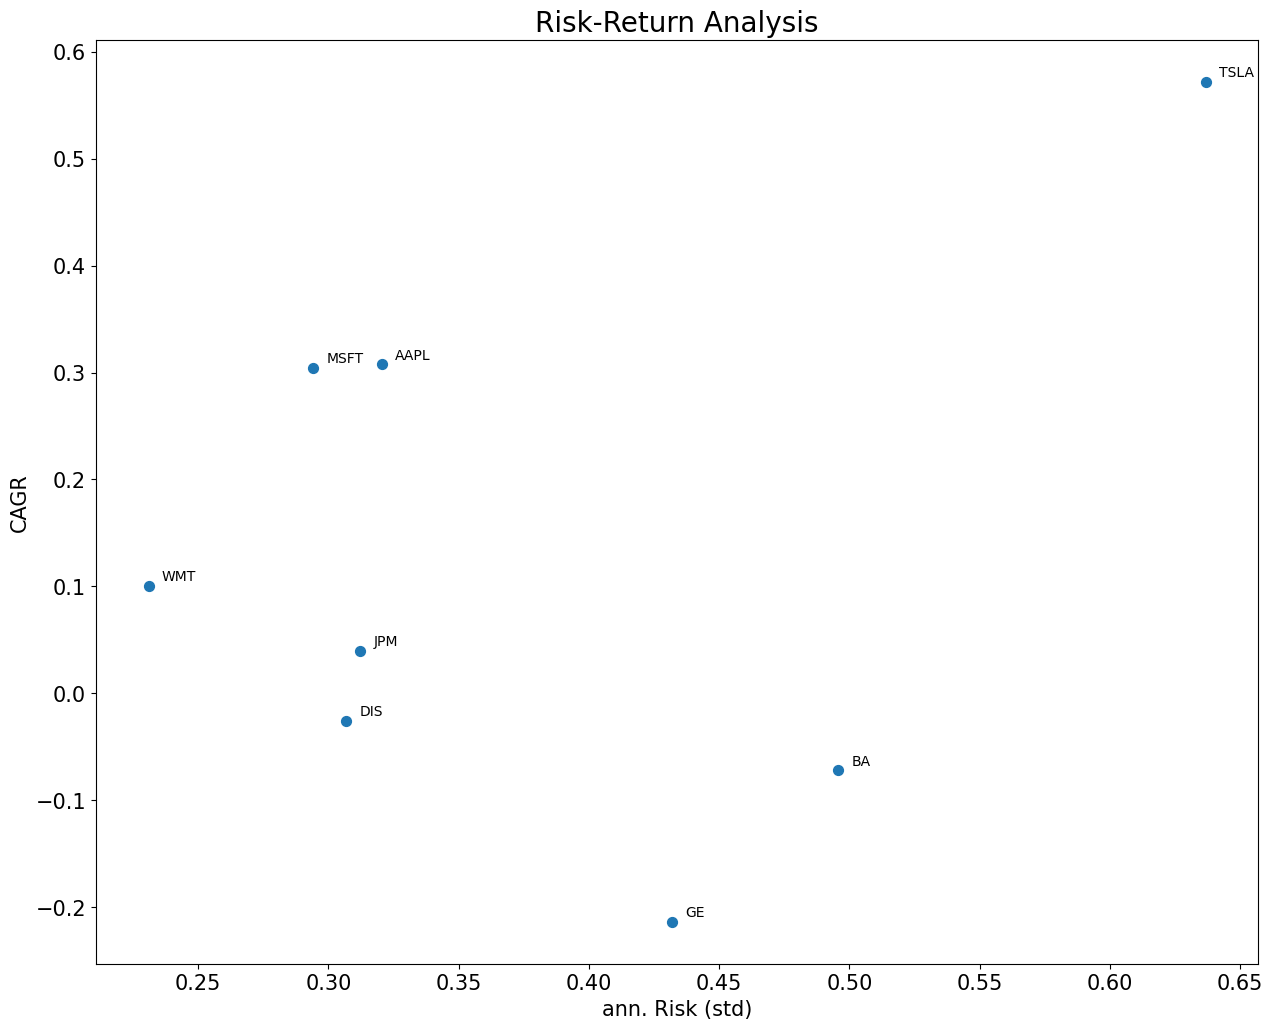

In [249]:
summary.plot(kind = "scatter", x = "ann. Risk", y = "CAGR", figsize = (15,12), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "ann. Risk"]+0.005, summary.loc[i, "CAGR"]+0.005), size = 10)
plt.xlabel("ann. Risk (std)", fontsize = 15)
plt.ylabel("CAGR", fontsize = 15)
plt.title("Risk-Return Analysis", fontsize = 20)
plt.show()

---

# 2-Asset-Case (Intro)

In [250]:
summary

,ann. Risk,CAGR
AAPL,0.320728,0.307632
BA,0.495809,-0.072108
DIS,0.306893,-0.025643
GE,0.431965,-0.213645
JPM,0.312289,0.039664
MSFT,0.294188,0.304624
TSLA,0.636709,0.572018
WMT,0.231063,0.100635


In [251]:
assets = ["WMT", "AAPL"]

In [252]:
subset = summary.loc[assets]
subset

,ann. Risk,CAGR
WMT,0.231063,0.100635
AAPL,0.320728,0.307632


In [253]:
subset.columns = ["Risk", "Return"]
subset

,Risk,Return
WMT,0.231063,0.100635
AAPL,0.320728,0.307632


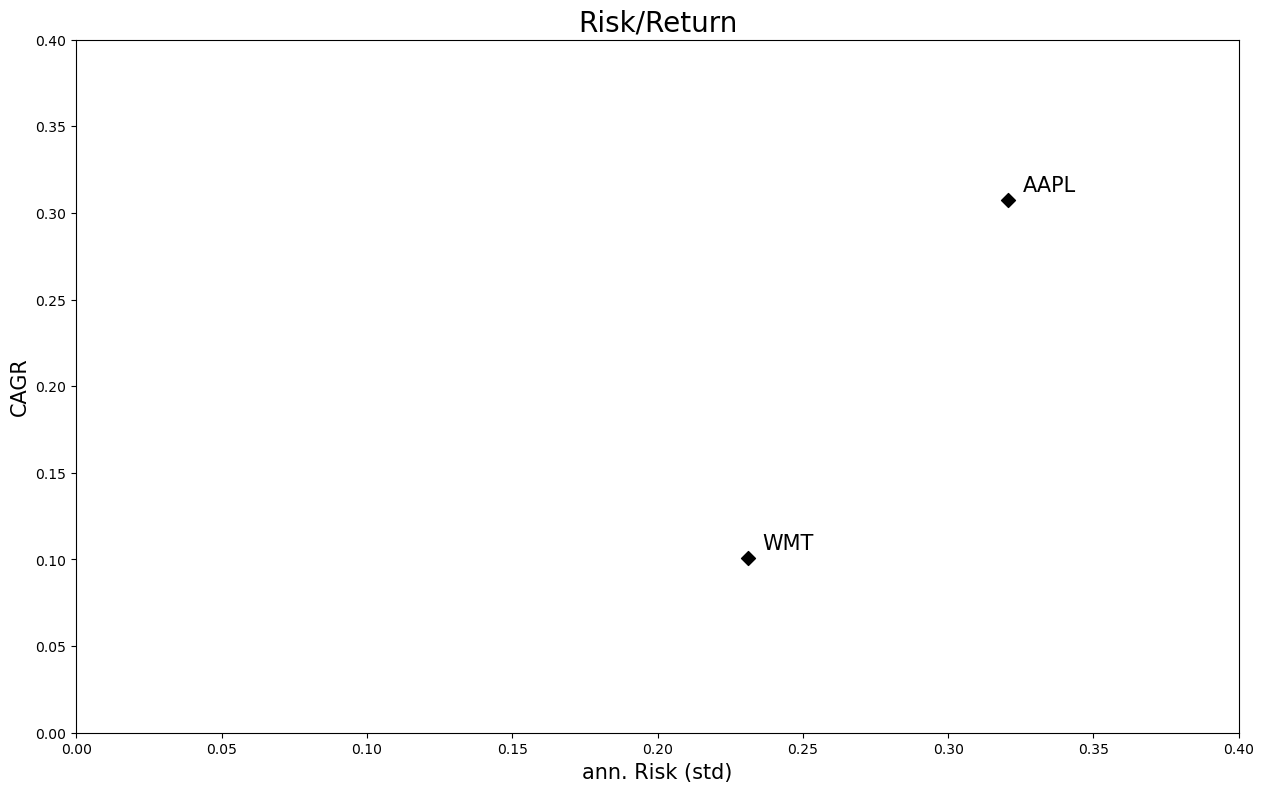

In [254]:
plt.figure(figsize = (15, 9))
plt.scatter(subset.loc[:, "Risk"], subset.loc[:, "Return"], s= 50, color = "black", marker = "D")
for i in subset.index:
    plt.annotate(i, xy=(subset.loc[i, "Risk"]+0.005, subset.loc[i, "Return"] + 0.005), size = 15)
plt.xlim(0, 0.4)
plt.ylim(0, 0.4)
plt.xlabel("ann. Risk (std)", fontsize = 15)
plt.ylabel("CAGR", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

---

# Portfolio Return (2-Asset-Case)

In [255]:
# Number of portfolios
nop = 100

In [256]:
# 100 different weigths for asset `A`
w_A = np.linspace(0, 1, nop)
w_A

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [257]:
# 100 different weigths for asset `B`
w_B = 1 - w_A
w_B

array([1.        , 0.98989899, 0.97979798, 0.96969697, 0.95959596,
       0.94949495, 0.93939394, 0.92929293, 0.91919192, 0.90909091,
       0.8989899 , 0.88888889, 0.87878788, 0.86868687, 0.85858586,
       0.84848485, 0.83838384, 0.82828283, 0.81818182, 0.80808081,
       0.7979798 , 0.78787879, 0.77777778, 0.76767677, 0.75757576,
       0.74747475, 0.73737374, 0.72727273, 0.71717172, 0.70707071,
       0.6969697 , 0.68686869, 0.67676768, 0.66666667, 0.65656566,
       0.64646465, 0.63636364, 0.62626263, 0.61616162, 0.60606061,
       0.5959596 , 0.58585859, 0.57575758, 0.56565657, 0.55555556,
       0.54545455, 0.53535354, 0.52525253, 0.51515152, 0.50505051,
       0.49494949, 0.48484848, 0.47474747, 0.46464646, 0.45454545,
       0.44444444, 0.43434343, 0.42424242, 0.41414141, 0.4040404 ,
       0.39393939, 0.38383838, 0.37373737, 0.36363636, 0.35353535,
       0.34343434, 0.33333333, 0.32323232, 0.31313131, 0.3030303 ,
       0.29292929, 0.28282828, 0.27272727, 0.26262626, 0.25252

In [258]:
# Stack the wegiths of both the assets
weights = np.vstack((w_A, w_B)).T
weights

array([[0.        , 1.        ],
       [0.01010101, 0.98989899],
       [0.02020202, 0.97979798],
       [0.03030303, 0.96969697],
       [0.04040404, 0.95959596],
       [0.05050505, 0.94949495],
       [0.06060606, 0.93939394],
       [0.07070707, 0.92929293],
       [0.08080808, 0.91919192],
       [0.09090909, 0.90909091],
       [0.1010101 , 0.8989899 ],
       [0.11111111, 0.88888889],
       [0.12121212, 0.87878788],
       [0.13131313, 0.86868687],
       [0.14141414, 0.85858586],
       [0.15151515, 0.84848485],
       [0.16161616, 0.83838384],
       [0.17171717, 0.82828283],
       [0.18181818, 0.81818182],
       [0.19191919, 0.80808081],
       [0.2020202 , 0.7979798 ],
       [0.21212121, 0.78787879],
       [0.22222222, 0.77777778],
       [0.23232323, 0.76767677],
       [0.24242424, 0.75757576],
       [0.25252525, 0.74747475],
       [0.26262626, 0.73737374],
       [0.27272727, 0.72727273],
       [0.28282828, 0.71717172],
       [0.29292929, 0.70707071],
       [0.

In [259]:
# The first wegiths combination.. 
w2 = weights[1]
w2

array([0.01010101, 0.98989899])

In [260]:
subset

,Risk,Return
WMT,0.231063,0.100635
AAPL,0.320728,0.307632


__Portfolio Returns__ (weighted average)

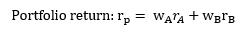

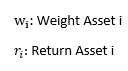

In [261]:
# formula (alternative 1)
r2 = w2[0] * subset.loc["WMT", "Return"] + w2[1] * subset.loc["AAPL", "Return"]
r2

0.3055406313239327

In [262]:
# vectorized (alternative 2 - the generic way)
r2 = subset.Return.dot(w2)
r2

0.3055406313239327

In [263]:
## vectorized for many portfolios
port_ret = subset.Return.dot(weights.T)
port_ret

# the portfolio rethen of portfolio 0 will be 0.3076315
# the portfolio rethen of portfolio 1 will be 0.30554063
# and so on..

array([0.3076315 , 0.30554063, 0.30344976, 0.30135889, 0.29926802,
       0.29717714, 0.29508627, 0.2929954 , 0.29090453, 0.28881366,
       0.28672279, 0.28463191, 0.28254104, 0.28045017, 0.2783593 ,
       0.27626843, 0.27417756, 0.27208668, 0.26999581, 0.26790494,
       0.26581407, 0.2637232 , 0.26163233, 0.25954145, 0.25745058,
       0.25535971, 0.25326884, 0.25117797, 0.2490871 , 0.24699622,
       0.24490535, 0.24281448, 0.24072361, 0.23863274, 0.23654187,
       0.23445099, 0.23236012, 0.23026925, 0.22817838, 0.22608751,
       0.22399664, 0.22190576, 0.21981489, 0.21772402, 0.21563315,
       0.21354228, 0.21145141, 0.20936053, 0.20726966, 0.20517879,
       0.20308792, 0.20099705, 0.19890618, 0.1968153 , 0.19472443,
       0.19263356, 0.19054269, 0.18845182, 0.18636095, 0.18427007,
       0.1821792 , 0.18008833, 0.17799746, 0.17590659, 0.17381572,
       0.17172484, 0.16963397, 0.1675431 , 0.16545223, 0.16336136,
       0.16127049, 0.15917961, 0.15708874, 0.15499787, 0.15290

---

# Portfolio Risk (2-Asset-Case) - a (too) simple solution

__Portfolio Risk__ (hypothesis: weighted average)

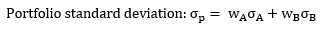

(note: to be discussed if correct...)

In [264]:
# The weigths of portfolio 2 
w2

array([0.01010101, 0.98989899])

In [265]:
subset

,Risk,Return
WMT,0.231063,0.100635
AAPL,0.320728,0.307632


In [266]:
# formula
std2 =  w2[0] * subset.loc["WMT", "Risk"] + w2[1] * subset.loc["AAPL", "Risk"] 
std2

0.31982216808517716

In [267]:
# vectorized
std2 = subset.Risk.dot(w2)
std2

0.31982216808517716

In [268]:
# vectorized for many portfolios
port_risk = subset.Risk.dot(weights.T)
port_risk

array([0.32072787, 0.31982217, 0.31891646, 0.31801076, 0.31710505,
       0.31619934, 0.31529364, 0.31438793, 0.31348223, 0.31257652,
       0.31167081, 0.31076511, 0.3098594 , 0.3089537 , 0.30804799,
       0.30714228, 0.30623658, 0.30533087, 0.30442516, 0.30351946,
       0.30261375, 0.30170805, 0.30080234, 0.29989663, 0.29899093,
       0.29808522, 0.29717952, 0.29627381, 0.2953681 , 0.2944624 ,
       0.29355669, 0.29265099, 0.29174528, 0.29083957, 0.28993387,
       0.28902816, 0.28812246, 0.28721675, 0.28631104, 0.28540534,
       0.28449963, 0.28359392, 0.28268822, 0.28178251, 0.28087681,
       0.2799711 , 0.27906539, 0.27815969, 0.27725398, 0.27634828,
       0.27544257, 0.27453686, 0.27363116, 0.27272545, 0.27181975,
       0.27091404, 0.27000833, 0.26910263, 0.26819692, 0.26729122,
       0.26638551, 0.2654798 , 0.2645741 , 0.26366839, 0.26276269,
       0.26185698, 0.26095127, 0.26004557, 0.25913986, 0.25823415,
       0.25732845, 0.25642274, 0.25551704, 0.25461133, 0.25370

__Plot the risk (the std), off all the 100 portfolios__ 

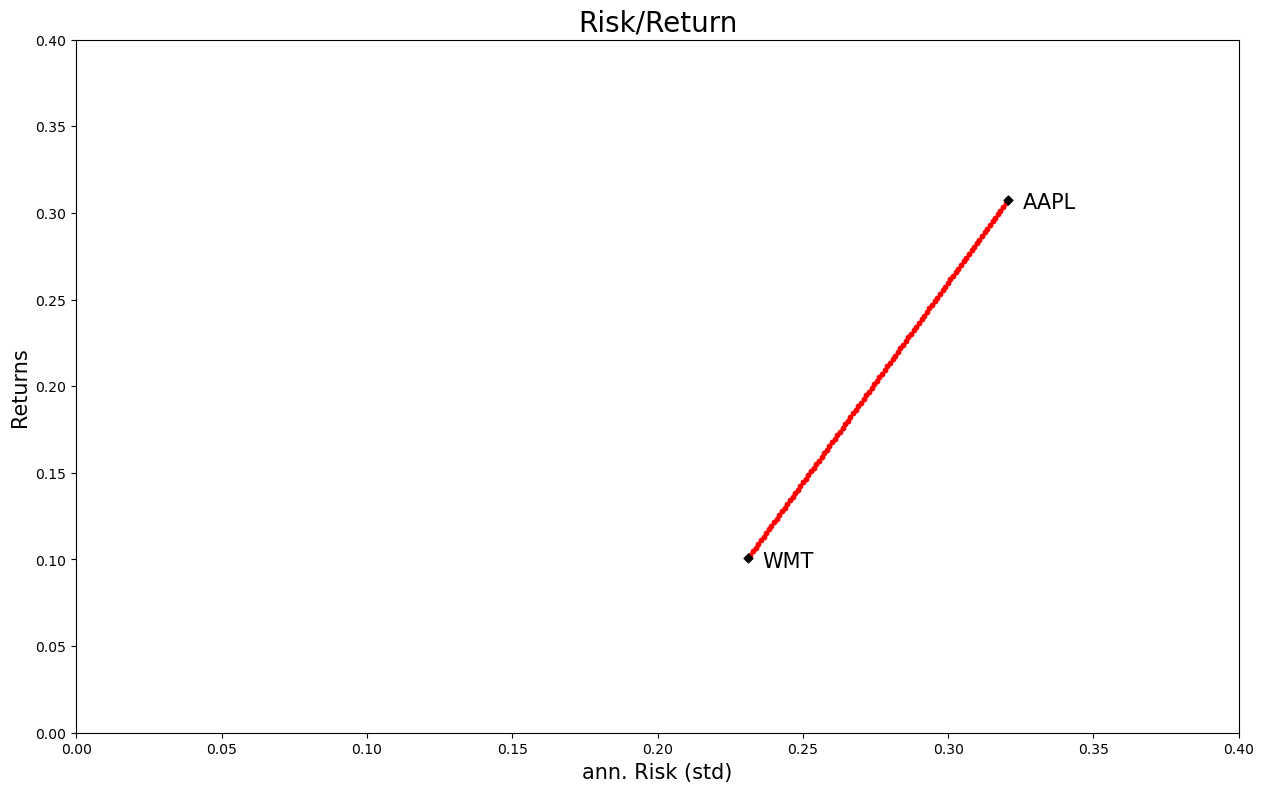

In [269]:
plt.figure(figsize = (15, 9))
plt.scatter(port_risk, port_ret, s= 10, color = "red")
plt.scatter(subset.loc[:, "Risk"], subset.loc[:, "Return"], s= 20, color = "black", marker = "D")
for i in subset.index:
    plt.annotate(i, xy=(subset.loc[i, "Risk"]+0.005, subset.loc[i, "Return"] - 0.005), size = 15)
plt.xlim(0, 0.4)
plt.ylim(0, 0.4)
plt.xlabel("ann. Risk (std)", fontsize = 15)
plt.ylabel("Returns", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

Straight Line -> No Diversification Effect!

__Complete/Correct Formula:__

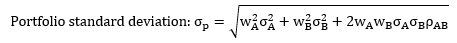

__Special Case__: if ρ_AB (Correlation) == 1 (perfect positive correlation):


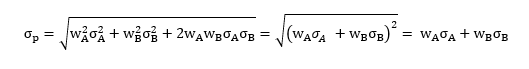

-> No Diversification Effect only if assets are __prefectly correlated__. If not, Portfolio Risk is __below weighted average Risk__!

__-> As long as correlation is below 1, there is a risk diversification effect!__

---

# Crash Course Statistics: Variance and Standard Deviation 

In [270]:
returns

,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT
Date,,,,,,,,
2017-07-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-05,0.004111,0.016214,-0.017030,-0.003643,0.010027,0.013349,-0.072401,-0.000531
2017-07-06,-0.009439,-0.001635,-0.021585,-0.038026,-0.003202,-0.007383,-0.055826,0.001992
2017-07-07,0.010159,0.004417,-0.000290,-0.006081,0.005033,0.012979,0.014215,-0.001855
2017-07-10,0.006104,0.007857,0.002613,-0.004206,-0.007032,0.007486,0.009035,-0.027877
...,...,...,...,...,...,...,...,...
2022-06-24,0.024517,0.056431,0.036903,0.046980,0.029846,0.034150,0.045249,0.000809
2022-06-27,0.000000,-0.019854,-0.011966,-0.005516,-0.008012,-0.010497,-0.003202,0.003233
2022-06-28,-0.029790,-0.000144,-0.007142,-0.012442,-0.004812,-0.031749,-0.050044,-0.014099


In [271]:
returns = returns[assets].copy()
returns

,WMT,AAPL
Date,,
2017-07-03,NaN,NaN
2017-07-05,-0.000531,0.004111
2017-07-06,0.001992,-0.009439
2017-07-07,-0.001855,0.010159
2017-07-10,-0.027877,0.006104
...,...,...
2022-06-24,0.000809,0.024517
2022-06-27,0.003233,0.000000
2022-06-28,-0.014099,-0.029790


__Variance__

In [272]:
var = returns.var()
var

WMT    0.000212
AAPL   0.000408
dtype: float64

__Standard Deviation__

In [273]:
std = returns.std()
std

WMT    0.014556
AAPL   0.020204
dtype: float64

__Relationship between Variance and Standard Deviation__

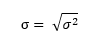

In [274]:
std**2 # variance

WMT    0.000212
AAPL   0.000408
dtype: float64

In [275]:
np.sqrt(var) # standard deviation

WMT    0.014556
AAPL   0.020204
dtype: float64

# Crash Course Statistics: Covariance and Correlation (Part 1)

In [276]:
returns

,WMT,AAPL
Date,,
2017-07-03,NaN,NaN
2017-07-05,-0.000531,0.004111
2017-07-06,0.001992,-0.009439
2017-07-07,-0.001855,0.010159
2017-07-10,-0.027877,0.006104
...,...,...
2022-06-24,0.000809,0.024517
2022-06-27,0.003233,0.000000
2022-06-28,-0.014099,-0.029790


In [277]:
returns["WMT_neg"] = -returns.WMT
returns

,WMT,AAPL,WMT_neg
Date,,,
2017-07-03,NaN,NaN,NaN
2017-07-05,-0.000531,0.004111,0.000531
2017-07-06,0.001992,-0.009439,-0.001992
2017-07-07,-0.001855,0.010159,0.001855
2017-07-10,-0.027877,0.006104,0.027877
...,...,...,...
2022-06-24,0.000809,0.024517,-0.000809
2022-06-27,0.003233,0.000000,-0.003233
2022-06-28,-0.014099,-0.029790,0.014099


In [278]:
corr_matrix = returns.corr()
corr_matrix

,WMT,AAPL,WMT_neg
WMT,1.000000,0.356524,-1.000000
AAPL,0.356524,1.000000,-0.356524
WMT_neg,-1.000000,-0.356524,1.000000


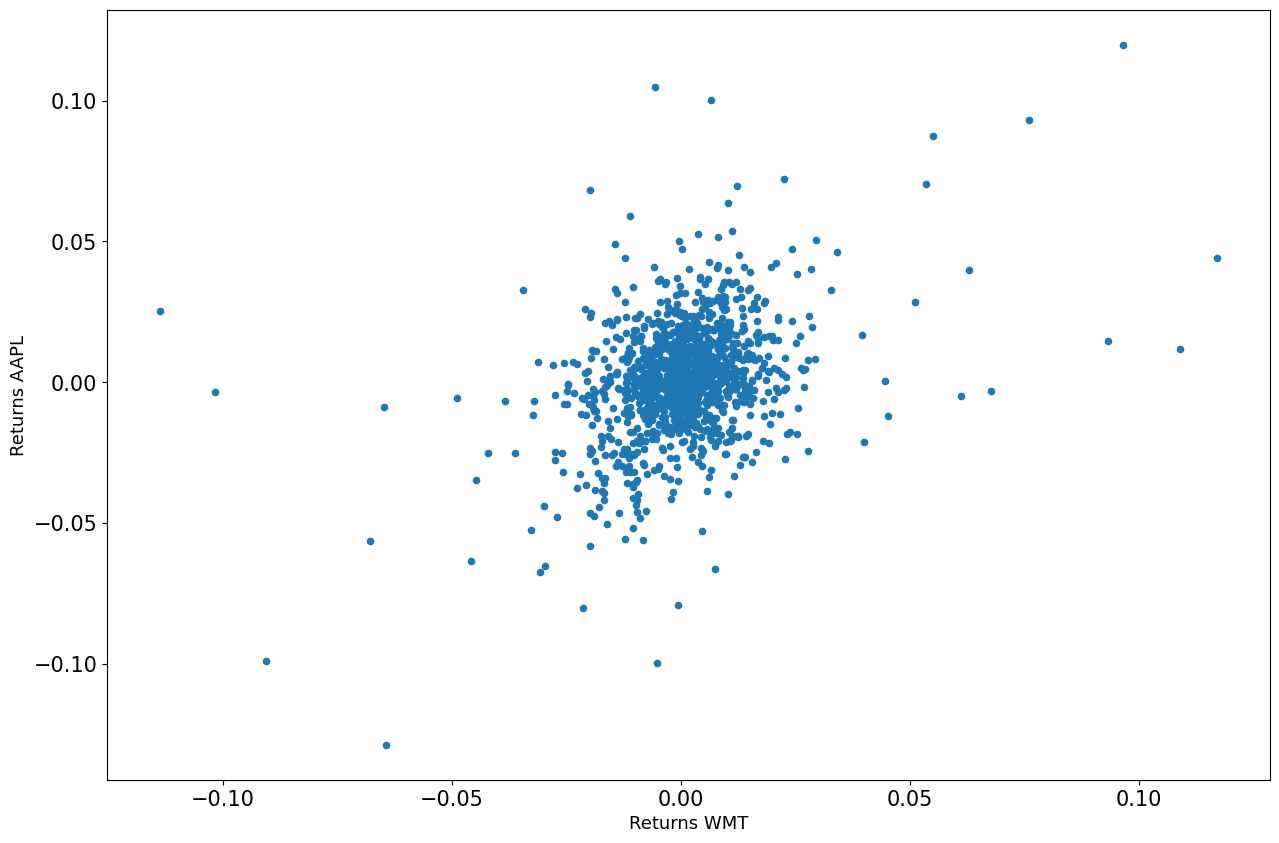

In [279]:
returns.plot(kind = "scatter", x = "WMT", y = "AAPL", figsize = (15, 10), fontsize = 15)
plt.xlabel("Returns WMT", fontsize = 13)
plt.ylabel("Returns AAPL", fontsize = 13)
plt.show()

__Correlation Coefficient:__ 

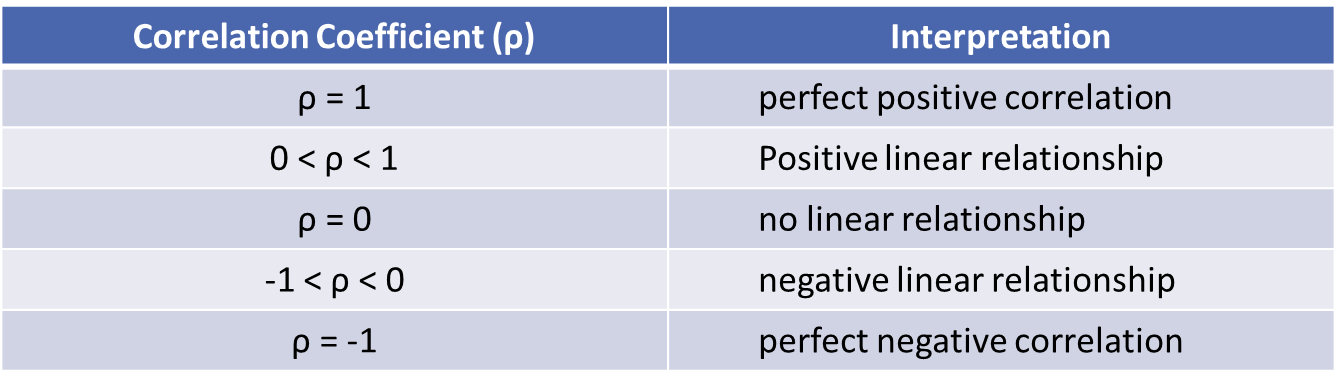

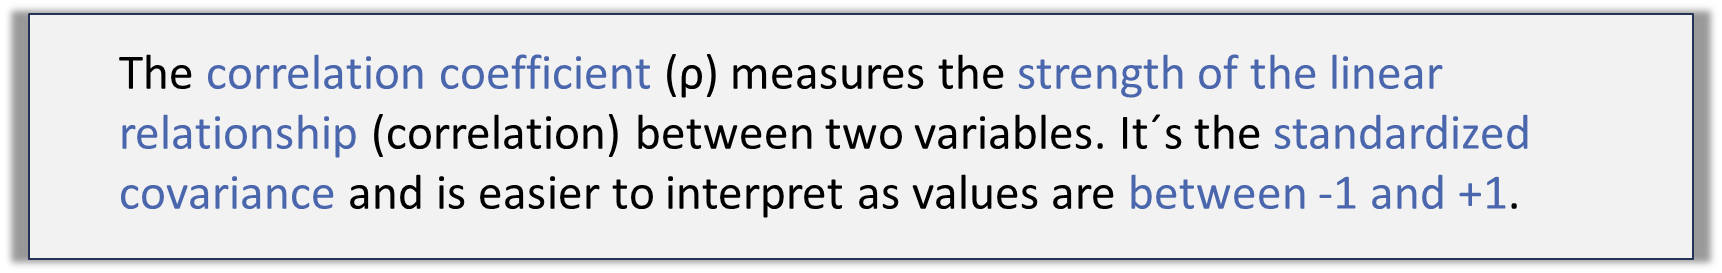

__Covariance__

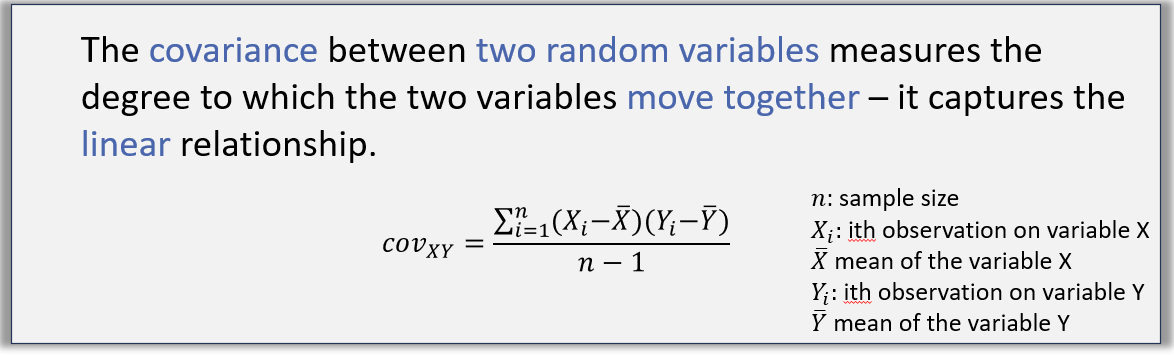

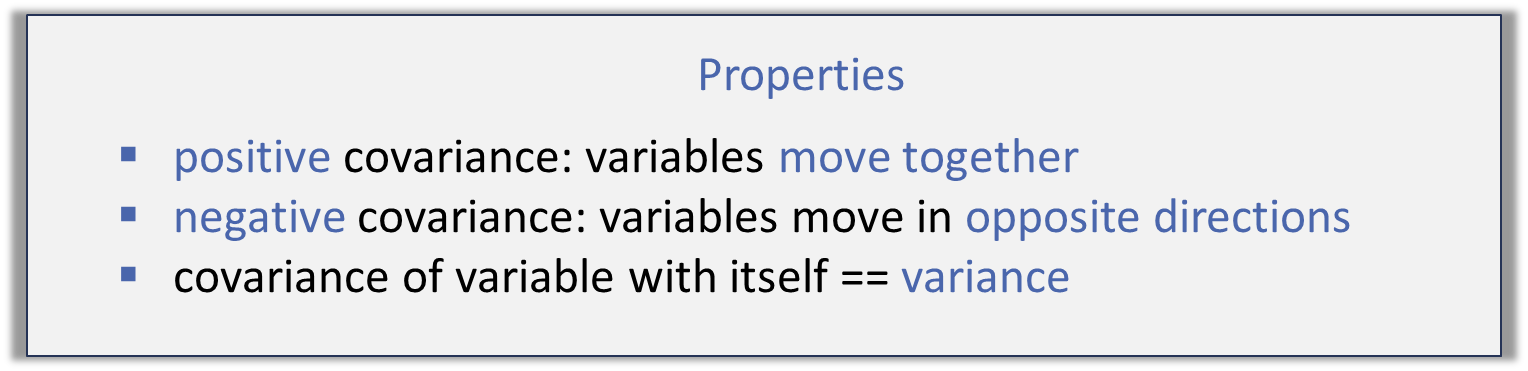

In [280]:
cov_matrix = returns.cov()
cov_matrix

,WMT,AAPL,WMT_neg
WMT,0.000212,0.000105,-0.000212
AAPL,0.000105,0.000408,-0.000105
WMT_neg,-0.000212,-0.000105,0.000212


In [281]:
returns.WMT.var()

0.00021186546500491708

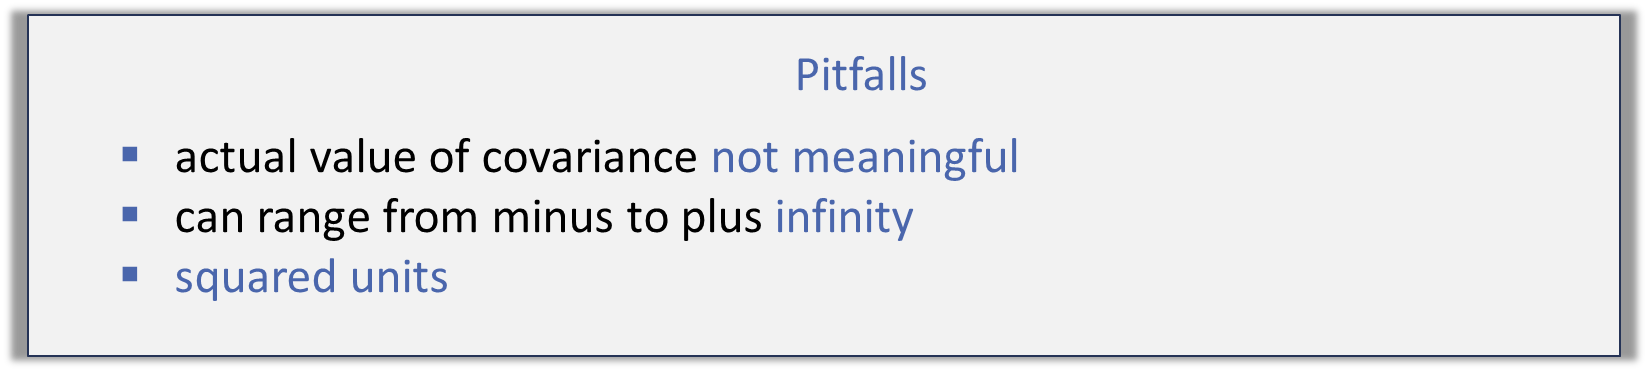

In [282]:
returns.drop("WMT_neg", axis = 1, inplace = True)
returns

,WMT,AAPL
Date,,
2017-07-03,NaN,NaN
2017-07-05,-0.000531,0.004111
2017-07-06,0.001992,-0.009439
2017-07-07,-0.001855,0.010159
2017-07-10,-0.027877,0.006104
...,...,...
2022-06-24,0.000809,0.024517
2022-06-27,0.003233,0.000000
2022-06-28,-0.014099,-0.029790


# Crash Course Statistics: Covariance and Correlation (Part 2)

In [283]:
returns

,WMT,AAPL
Date,,
2017-07-03,NaN,NaN
2017-07-05,-0.000531,0.004111
2017-07-06,0.001992,-0.009439
2017-07-07,-0.001855,0.010159
2017-07-10,-0.027877,0.006104
...,...,...
2022-06-24,0.000809,0.024517
2022-06-27,0.003233,0.000000
2022-06-28,-0.014099,-0.029790


In [284]:
# Covariance
cov_matrix = returns.cov()
cov_matrix

,WMT,AAPL
WMT,0.000212,0.000105
AAPL,0.000105,0.000408


In [285]:
# Correlation (normalization of covariance)
corr_matrix = returns.corr()
corr_matrix

,WMT,AAPL
WMT,1.000000,0.356524
AAPL,0.356524,1.000000


__Relationship between Correlation and Covariance__

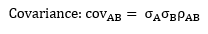

In [286]:
corr_matrix.loc["WMT", "AAPL"] * np.sqrt(cov_matrix.loc["WMT", "WMT"]) * np.sqrt(cov_matrix.loc["AAPL", "AAPL"])

0.00010484686035782588

In [287]:
cov_matrix.loc["WMT", "AAPL"]

0.00010484686035782588

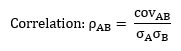

In [288]:
cov_matrix.loc["WMT", "AAPL"] / (np.sqrt(cov_matrix.loc["WMT", "WMT"]) * np.sqrt(cov_matrix.loc["AAPL", "AAPL"]))

0.35652411411850227

In [289]:
corr_matrix.loc["WMT", "AAPL"]

0.3565241141185022

---

# Portfolio Risk (2-Asset-Case) 

In [290]:
weights

array([[0.        , 1.        ],
       [0.01010101, 0.98989899],
       [0.02020202, 0.97979798],
       [0.03030303, 0.96969697],
       [0.04040404, 0.95959596],
       [0.05050505, 0.94949495],
       [0.06060606, 0.93939394],
       [0.07070707, 0.92929293],
       [0.08080808, 0.91919192],
       [0.09090909, 0.90909091],
       [0.1010101 , 0.8989899 ],
       [0.11111111, 0.88888889],
       [0.12121212, 0.87878788],
       [0.13131313, 0.86868687],
       [0.14141414, 0.85858586],
       [0.15151515, 0.84848485],
       [0.16161616, 0.83838384],
       [0.17171717, 0.82828283],
       [0.18181818, 0.81818182],
       [0.19191919, 0.80808081],
       [0.2020202 , 0.7979798 ],
       [0.21212121, 0.78787879],
       [0.22222222, 0.77777778],
       [0.23232323, 0.76767677],
       [0.24242424, 0.75757576],
       [0.25252525, 0.74747475],
       [0.26262626, 0.73737374],
       [0.27272727, 0.72727273],
       [0.28282828, 0.71717172],
       [0.29292929, 0.70707071],
       [0.

In [291]:
w2

array([0.01010101, 0.98989899])

In [292]:
subset

,Risk,Return
WMT,0.231063,0.100635
AAPL,0.320728,0.307632


In [293]:
# assuming perfect correlation (==1)
std2 = subset.Risk.dot(w2)
std2

0.31982216808517716

__Formula (2-Asset-Case:)__

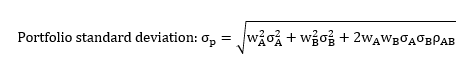

In [294]:
cov_matrix # daily

,WMT,AAPL
WMT,0.000212,0.000105
AAPL,0.000105,0.000408


In [295]:
cov_matrix = cov_matrix * 252 # annual
cov_matrix

,WMT,AAPL
WMT,0.053390,0.026421
AAPL,0.026421,0.102866


In [296]:
corr_matrix

,WMT,AAPL
WMT,1.000000,0.356524
AAPL,0.356524,1.000000


In [297]:
np.sqrt(w2[0]**2*cov_matrix.loc["WMT", "WMT"] + w2[1]**2*cov_matrix.loc["AAPL", "AAPL"] + 2*w2[0]*w2[1]*np.sqrt(cov_matrix.loc["WMT", "WMT"])*np.sqrt(cov_matrix.loc["AAPL", "AAPL"])*corr_matrix.loc["WMT", "AAPL"])

0.31832778384391275

__More general Formula (Linear Algebra):__

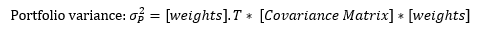

In [298]:
# Portfolio variance
np.sqrt(w2.dot(cov_matrix).dot(w2))

0.31832778384391275

__many portfolios:__

In [299]:
# Calculate many portfolio risk (variance)
# Each portfolio and its risk. 
np.sqrt((weights.dot(cov_matrix) * weights).sum(axis = 1))

array([0.32072787, 0.31832778, 0.31594286, 0.31357344, 0.31121989,
       0.30888257, 0.30656184, 0.30425809, 0.30197171, 0.29970309,
       0.29745265, 0.29522079, 0.29300794, 0.29081453, 0.28864101,
       0.28648784, 0.28435546, 0.28224436, 0.28015502, 0.27808792,
       0.27604357, 0.27402247, 0.27202514, 0.27005212, 0.26810393,
       0.26618112, 0.26428425, 0.26241388, 0.26057057, 0.25875492,
       0.25696749, 0.2552089 , 0.25347973, 0.25178059, 0.2501121 ,
       0.24847488, 0.24686953, 0.2452967 , 0.24375701, 0.24225109,
       0.24077957, 0.2393431 , 0.2379423 , 0.2365778 , 0.23525025,
       0.23396027, 0.23270848, 0.2314955 , 0.23032195, 0.22918844,
       0.22809555, 0.22704387, 0.22603399, 0.22506647, 0.22414184,
       0.22326065, 0.22242341, 0.22163062, 0.22088276, 0.22018028,
       0.21952363, 0.21891321, 0.21834941, 0.21783259, 0.21736309,
       0.21694122, 0.21656726, 0.21624144, 0.215964  , 0.21573512,
       0.21555494, 0.2154236 , 0.21534119, 0.21530775, 0.21532

---

# Correlation and the Portfolio Diversification Effect

In [300]:
corr_matrix
# The correlation between `Asset_1` and `Asset_2` 

,WMT,AAPL
WMT,1.000000,0.356524
AAPL,0.356524,1.000000


-> moderate positve correlation <br>
-> there must be a __portfolio diversification effect__ (no straight line)

In [301]:
port_ret

array([0.3076315 , 0.30554063, 0.30344976, 0.30135889, 0.29926802,
       0.29717714, 0.29508627, 0.2929954 , 0.29090453, 0.28881366,
       0.28672279, 0.28463191, 0.28254104, 0.28045017, 0.2783593 ,
       0.27626843, 0.27417756, 0.27208668, 0.26999581, 0.26790494,
       0.26581407, 0.2637232 , 0.26163233, 0.25954145, 0.25745058,
       0.25535971, 0.25326884, 0.25117797, 0.2490871 , 0.24699622,
       0.24490535, 0.24281448, 0.24072361, 0.23863274, 0.23654187,
       0.23445099, 0.23236012, 0.23026925, 0.22817838, 0.22608751,
       0.22399664, 0.22190576, 0.21981489, 0.21772402, 0.21563315,
       0.21354228, 0.21145141, 0.20936053, 0.20726966, 0.20517879,
       0.20308792, 0.20099705, 0.19890618, 0.1968153 , 0.19472443,
       0.19263356, 0.19054269, 0.18845182, 0.18636095, 0.18427007,
       0.1821792 , 0.18008833, 0.17799746, 0.17590659, 0.17381572,
       0.17172484, 0.16963397, 0.1675431 , 0.16545223, 0.16336136,
       0.16127049, 0.15917961, 0.15708874, 0.15499787, 0.15290

In [302]:
# Calculate the portfolios risk 
port_risk = np.sqrt((weights.dot(cov_matrix) * weights).sum(axis = 1))
port_risk

array([0.32072787, 0.31832778, 0.31594286, 0.31357344, 0.31121989,
       0.30888257, 0.30656184, 0.30425809, 0.30197171, 0.29970309,
       0.29745265, 0.29522079, 0.29300794, 0.29081453, 0.28864101,
       0.28648784, 0.28435546, 0.28224436, 0.28015502, 0.27808792,
       0.27604357, 0.27402247, 0.27202514, 0.27005212, 0.26810393,
       0.26618112, 0.26428425, 0.26241388, 0.26057057, 0.25875492,
       0.25696749, 0.2552089 , 0.25347973, 0.25178059, 0.2501121 ,
       0.24847488, 0.24686953, 0.2452967 , 0.24375701, 0.24225109,
       0.24077957, 0.2393431 , 0.2379423 , 0.2365778 , 0.23525025,
       0.23396027, 0.23270848, 0.2314955 , 0.23032195, 0.22918844,
       0.22809555, 0.22704387, 0.22603399, 0.22506647, 0.22414184,
       0.22326065, 0.22242341, 0.22163062, 0.22088276, 0.22018028,
       0.21952363, 0.21891321, 0.21834941, 0.21783259, 0.21736309,
       0.21694122, 0.21656726, 0.21624144, 0.215964  , 0.21573512,
       0.21555494, 0.2154236 , 0.21534119, 0.21530775, 0.21532

__Plot the Diversification effect__

__Interpretation__
- The correlation between those two assets is: `0.356524`. 
    - So with this correlation, this is the diversification levels for different combination of weigths! 

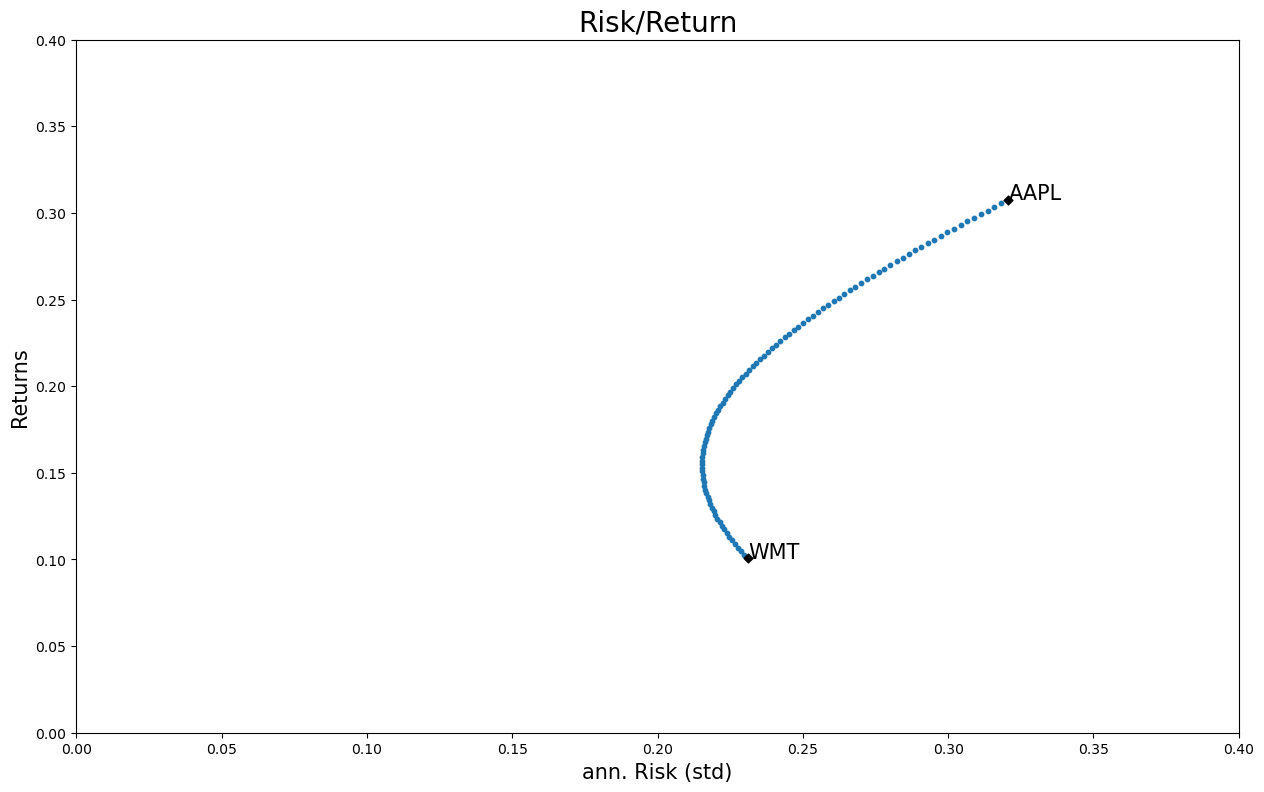

In [303]:
plt.figure(figsize = (15, 9))

# Plot the portfolios risk, and portfolios return
plt.scatter(port_risk, port_ret, s = 10)
plt.scatter(subset.loc[:, "Risk"], subset.loc[:, "Return"], s= 20, color = "black", marker = "D")

for i in subset.index:
    plt.annotate(i, xy=(subset.loc[i, "Risk"]+0.00005, subset.loc[i, "Return"]+0.00005), size = 15)

plt.xlim(0, 0.4)
plt.ylim(0, 0.4)
plt.xlabel("ann. Risk (std)", fontsize = 15)
plt.ylabel("Returns", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

__Now assuming various values for the Correlation Coefficient__ (everything else equal)


In [304]:
corrs = [(-1, "green"), (-0.5, "yellow"), (0, "grey"), (0.5, "blue"), (1, "red")]

In [305]:
weights

array([[0.        , 1.        ],
       [0.01010101, 0.98989899],
       [0.02020202, 0.97979798],
       [0.03030303, 0.96969697],
       [0.04040404, 0.95959596],
       [0.05050505, 0.94949495],
       [0.06060606, 0.93939394],
       [0.07070707, 0.92929293],
       [0.08080808, 0.91919192],
       [0.09090909, 0.90909091],
       [0.1010101 , 0.8989899 ],
       [0.11111111, 0.88888889],
       [0.12121212, 0.87878788],
       [0.13131313, 0.86868687],
       [0.14141414, 0.85858586],
       [0.15151515, 0.84848485],
       [0.16161616, 0.83838384],
       [0.17171717, 0.82828283],
       [0.18181818, 0.81818182],
       [0.19191919, 0.80808081],
       [0.2020202 , 0.7979798 ],
       [0.21212121, 0.78787879],
       [0.22222222, 0.77777778],
       [0.23232323, 0.76767677],
       [0.24242424, 0.75757576],
       [0.25252525, 0.74747475],
       [0.26262626, 0.73737374],
       [0.27272727, 0.72727273],
       [0.28282828, 0.71717172],
       [0.29292929, 0.70707071],
       [0.

In [306]:
subset

,Risk,Return
WMT,0.231063,0.100635
AAPL,0.320728,0.307632


In [307]:
cov_matrix

,WMT,AAPL
WMT,0.053390,0.026421
AAPL,0.026421,0.102866


In [308]:
port_ret

array([0.3076315 , 0.30554063, 0.30344976, 0.30135889, 0.29926802,
       0.29717714, 0.29508627, 0.2929954 , 0.29090453, 0.28881366,
       0.28672279, 0.28463191, 0.28254104, 0.28045017, 0.2783593 ,
       0.27626843, 0.27417756, 0.27208668, 0.26999581, 0.26790494,
       0.26581407, 0.2637232 , 0.26163233, 0.25954145, 0.25745058,
       0.25535971, 0.25326884, 0.25117797, 0.2490871 , 0.24699622,
       0.24490535, 0.24281448, 0.24072361, 0.23863274, 0.23654187,
       0.23445099, 0.23236012, 0.23026925, 0.22817838, 0.22608751,
       0.22399664, 0.22190576, 0.21981489, 0.21772402, 0.21563315,
       0.21354228, 0.21145141, 0.20936053, 0.20726966, 0.20517879,
       0.20308792, 0.20099705, 0.19890618, 0.1968153 , 0.19472443,
       0.19263356, 0.19054269, 0.18845182, 0.18636095, 0.18427007,
       0.1821792 , 0.18008833, 0.17799746, 0.17590659, 0.17381572,
       0.17172484, 0.16963397, 0.1675431 , 0.16545223, 0.16336136,
       0.16127049, 0.15917961, 0.15708874, 0.15499787, 0.15290

__What is mean?__

- That if the assets correlation be __`-1,-0.5, 0, 0.5, 1`__,the different combination of weigths will effect on the retun & risk in this way.

> __And this is the Effect of diversification!__ 

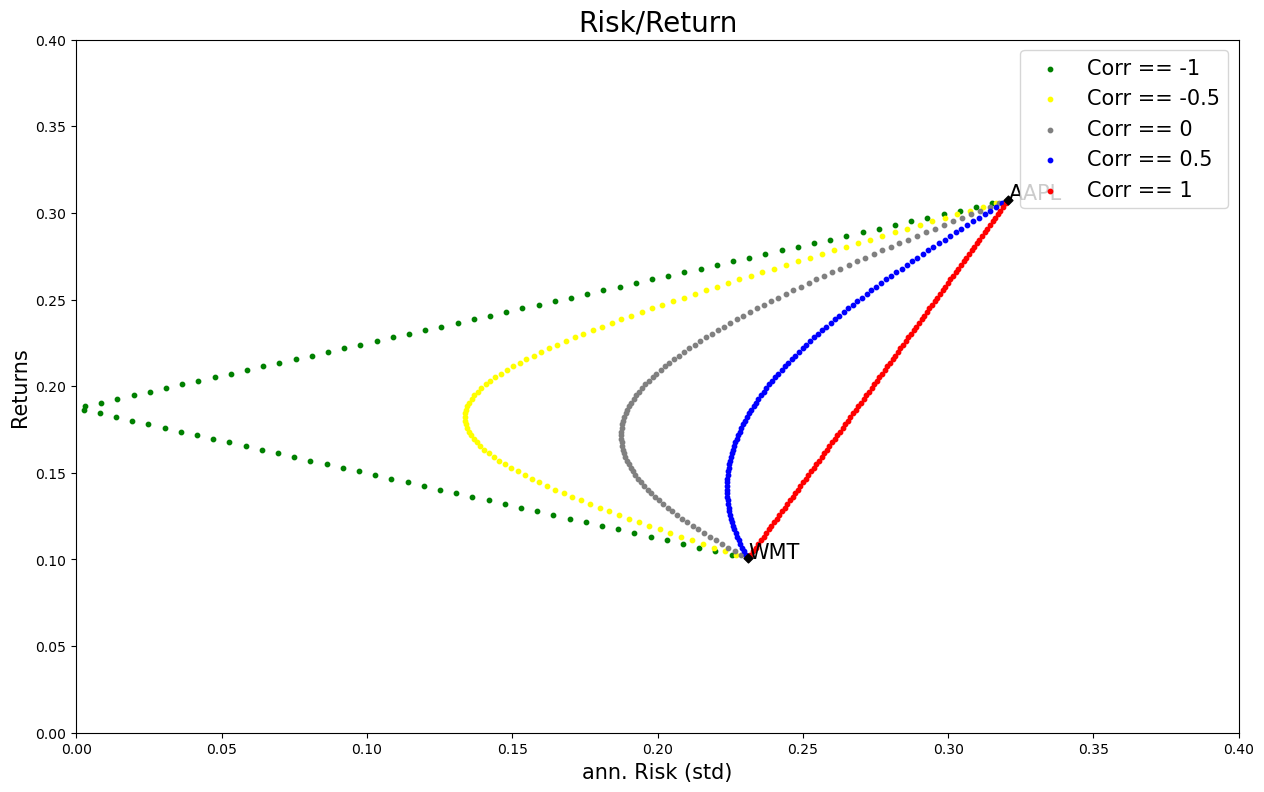

In [309]:
plt.figure(figsize = (15, 9))
for corr in corrs:
    
    # Calculate the covariance
    cov = corr[0] * np.sqrt(cov_matrix.iloc[0,0]) * np.sqrt(cov_matrix.iloc[1,1])
    cov_matrix.iloc[0,1] = cov
    cov_matrix.iloc[1,0] = cov
    port_risk = np.sqrt((weights.dot(cov_matrix) * weights).sum(axis = 1))
    
    plt.scatter(port_risk, port_ret, s = 10, color = corr[1],  label = "Corr == {}".format(corr[0]))
plt.scatter(subset.loc[:, "Risk"], subset.loc[:, "Return"], s= 20, color = "black", marker = "D")
for i in subset.index:
    plt.annotate(i, xy=(subset.loc[i, "Risk"]+0.00005, subset.loc[i, "Return"]+0.00005), size = 15)
plt.xlim(0, 0.4)
plt.ylim(0, 0.4)
plt.xlabel("ann. Risk (std)", fontsize = 15)
plt.ylabel("Returns", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.legend(fontsize = 15)
plt.show()

-> Portfolio Diversification Effect: more Return for the same Risk / less Risk for the same Return (__"the only free lunch in the market"__)

---

# Multiple Asset Case
As waht we did above, but now with multiple assets.

In [408]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [409]:
df = pd.read_csv("stocks.csv", parse_dates = ["Date"], index_col = "Date")
df

,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT
Date,,,,,,,,
2017-07-03,35.875000,198.589996,107.459999,211.153839,92.750000,68.169998,23.507999,75.360001
2017-07-05,36.022499,201.809998,105.629997,210.384613,93.680000,69.080002,21.806000,75.320000
2017-07-06,35.682499,201.479996,103.349998,202.384613,93.379997,68.570000,20.588667,75.470001
2017-07-07,36.044998,202.369995,103.320000,201.153839,93.849998,69.459999,20.881332,75.330002
2017-07-10,36.264999,203.960007,103.589996,200.307693,93.190002,69.980003,21.070000,73.230003
...,...,...,...,...,...,...,...,...
2022-06-24,141.660004,141.529999,97.779999,67.080002,117.320000,267.700012,245.706665,123.720001
2022-06-27,141.660004,138.720001,96.610001,66.709999,116.379997,264.890015,244.919998,124.120003
2022-06-28,137.440002,138.699997,95.919998,65.879997,115.820000,256.480011,232.663330,122.370003


In [411]:
# assets = ["WMT", "AAPL", "BA"] # 3-Asset-Case
assets = df.columns

In [412]:
subset = df[assets].copy()
subset

,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT
Date,,,,,,,,
2017-07-03,35.875000,198.589996,107.459999,211.153839,92.750000,68.169998,23.507999,75.360001
2017-07-05,36.022499,201.809998,105.629997,210.384613,93.680000,69.080002,21.806000,75.320000
2017-07-06,35.682499,201.479996,103.349998,202.384613,93.379997,68.570000,20.588667,75.470001
2017-07-07,36.044998,202.369995,103.320000,201.153839,93.849998,69.459999,20.881332,75.330002
2017-07-10,36.264999,203.960007,103.589996,200.307693,93.190002,69.980003,21.070000,73.230003
...,...,...,...,...,...,...,...,...
2022-06-24,141.660004,141.529999,97.779999,67.080002,117.320000,267.700012,245.706665,123.720001
2022-06-27,141.660004,138.720001,96.610001,66.709999,116.379997,264.890015,244.919998,124.120003
2022-06-28,137.440002,138.699997,95.919998,65.879997,115.820000,256.480011,232.663330,122.370003


In [413]:
returns = subset.pct_change()
returns

,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT
Date,,,,,,,,
2017-07-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-05,0.004111,0.016214,-0.017030,-0.003643,0.010027,0.013349,-0.072401,-0.000531
2017-07-06,-0.009439,-0.001635,-0.021585,-0.038026,-0.003202,-0.007383,-0.055826,0.001992
2017-07-07,0.010159,0.004417,-0.000290,-0.006081,0.005033,0.012979,0.014215,-0.001855
2017-07-10,0.006104,0.007857,0.002613,-0.004206,-0.007032,0.007486,0.009035,-0.027877
...,...,...,...,...,...,...,...,...
2022-06-24,0.024517,0.056431,0.036903,0.046980,0.029846,0.034150,0.045249,0.000809
2022-06-27,0.000000,-0.019854,-0.011966,-0.005516,-0.008012,-0.010497,-0.003202,0.003233
2022-06-28,-0.029790,-0.000144,-0.007142,-0.012442,-0.004812,-0.031749,-0.050044,-0.014099


In [414]:
def ann_risk_return(returns_df): # assumes simple returns as input
    summary = pd.DataFrame(index = returns_df.columns)
    summary["ann. Risk"] = returns_df.std() * np.sqrt(252)
    log_returns = np.log(returns_df + 1)
    summary["CAGR"] = np.exp(log_returns.mean() * 252) - 1
    return summary

In [415]:
summary = ann_risk_return(returns)
summary

,ann. Risk,CAGR
AAPL,0.320728,0.307632
BA,0.495809,-0.072108
DIS,0.306893,-0.025643
GE,0.431965,-0.213645
JPM,0.312289,0.039664
MSFT,0.294188,0.304624
TSLA,0.636709,0.572018
WMT,0.231063,0.100635


In [416]:
# Calculate the annualize covariance
cov_matrix = returns.cov() * 252
cov_matrix

,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT
AAPL,0.102866,0.067416,0.043946,0.047265,0.046183,0.071477,0.092623,0.026421
BA,0.067416,0.245827,0.082928,0.118994,0.095169,0.061479,0.102927,0.019042
DIS,0.043946,0.082928,0.094183,0.060511,0.058722,0.044061,0.056623,0.016952
GE,0.047265,0.118994,0.060511,0.186594,0.077749,0.041297,0.063457,0.014483
JPM,0.046183,0.095169,0.058722,0.077749,0.097524,0.045000,0.052689,0.018958
MSFT,0.071477,0.061479,0.044061,0.041297,0.045000,0.086547,0.085218,0.026760
TSLA,0.092623,0.102927,0.056623,0.063457,0.052689,0.085218,0.405398,0.021022
WMT,0.026421,0.019042,0.016952,0.014483,0.018958,0.026760,0.021022,0.053390


In [417]:
noa = len(returns.columns) # number of assets
noa

8

In [418]:
nop = 1000000 # number of random portfolios
nop

1000000

In [419]:
np.random.seed(123)
matrix = np.random.random(noa * nop).reshape(nop, noa)

In [420]:
matrix

array([[0.69646919, 0.28613933, 0.22685145, ..., 0.42310646, 0.9807642 ,
        0.68482974],
       [0.4809319 , 0.39211752, 0.34317802, ..., 0.0596779 , 0.39804426,
        0.73799541],
       [0.18249173, 0.17545176, 0.53155137, ..., 0.84943179, 0.72445532,
        0.61102351],
       ...,
       [0.18545944, 0.18261297, 0.37206753, ..., 0.47807435, 0.74702059,
        0.31251685],
       [0.10036313, 0.24877151, 0.04223536, ..., 0.07871995, 0.31484768,
        0.46426004],
       [0.05506793, 0.51125988, 0.3399751 , ..., 0.8072304 , 0.2528185 ,
        0.32188729]])

In [421]:
matrix.sum(axis = 1, keepdims= True)

array([[4.56894411],
       [3.57956695],
       [4.24063404],
       ...,
       [4.04710791],
       [2.94202118],
       [4.03188317]])

In [422]:
weights = matrix / matrix.sum(axis = 1, keepdims= True)
weights

array([[0.15243548, 0.06262702, 0.04965074, ..., 0.09260487, 0.21465883,
        0.14988797],
       [0.13435477, 0.10954328, 0.09587138, ..., 0.01667182, 0.111199  ,
        0.20616891],
       [0.04303407, 0.04137394, 0.12534715, ..., 0.20030773, 0.17083656,
        0.14408777],
       ...,
       [0.04582518, 0.04512184, 0.09193417, ..., 0.1181274 , 0.18458134,
        0.0772198 ],
       [0.03411367, 0.08455803, 0.0143559 , ..., 0.0267571 , 0.10701748,
        0.15780309],
       [0.01365812, 0.12680424, 0.08432166, ..., 0.20021175, 0.06270482,
        0.07983547]])

__one portfolio__

In [423]:
w1 = weights[0]
w1

array([0.15243548, 0.06262702, 0.04965074, 0.12066568, 0.15746942,
       0.09260487, 0.21465883, 0.14988797])

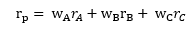

In [424]:
# Linear Algebra
# summary.CAGR -> the CAGR of each asset
# w1 -> the portfolio weigths
ret1 = summary.CAGR.dot(w1)
ret1

0.18765350972105876

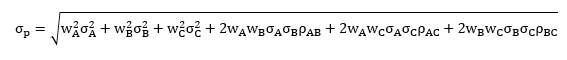

In [425]:
# Linear Algebra
# compute the variance (risk)

risk1 =  np.sqrt((w1.dot(cov_matrix).dot(w1)))
risk1

0.2738931633170474

__multiple portfolios__

In [426]:
# Calculate the portfolio return of all the portfolios 
# summary.CAGR -> the CAGR of each asset
# weights -> all the different combination of wegiths
port_ret = summary.CAGR.dot(weights.T)
port_ret

array([0.18765351, 0.08175535, 0.1594215 , ..., 0.11937983, 0.02880053,
       0.05915579])

In [427]:
# Now calculate the risk (variance) for all the portfolios 
# all weights * covariance of the assets * wegiths. than sum()  
port_risk = np.sqrt((weights.dot(cov_matrix) * weights).sum(axis = 1))
port_risk

array([0.27389316, 0.25536191, 0.25796314, ..., 0.27940527, 0.27871561,
       0.26940265])

__See the full set of possible portfolios__

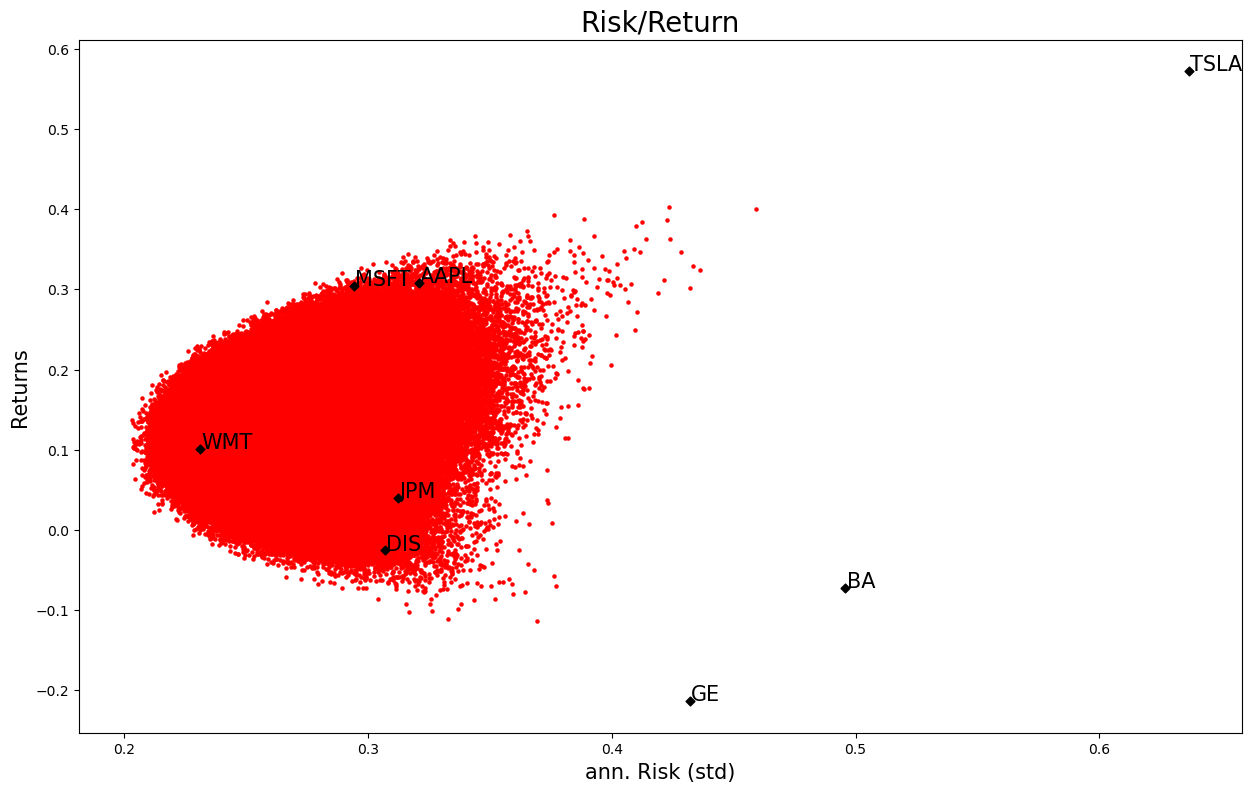

In [428]:
plt.figure(figsize = (15, 9))
plt.scatter(port_risk, port_ret, s= 5, color = "red")
plt.scatter(summary.loc[:, "ann. Risk"], summary.loc[:, "CAGR"], s= 20, color = "black", marker = "D")
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "ann. Risk"]+0.0005, summary.loc[i, "CAGR"]+0.0005), size = 15)
plt.xlabel("ann. Risk (std)", fontsize = 15)
plt.ylabel("Returns", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

---

# Forward-looking Optimization
> **Get the optimal portfolio - using linear algebra**. This is a way to find the best weigths.

__Challenge__: We need to __forecast__ inputs like __Covariance Matrix__ and __Returns__

__Simple Solution__: Use __past__ Covariance Matrix and Returns

- __Problem__: Past performance is __not a (good) indicator__ for future performance (in particular Returns)

__Solution__:<br>
- using past Coveriance Matrix or variants of it (e.g. shrinkage) is widely accepted <br>
- using past Returns is not accepted (see pitfalls)
    

__Optimization Tools__:

We can, again, use __scipy optimizer__ (numerical/iterative optimization) or...

> __Unbounded Optimization with Linear Algebra (formula based)__

In [462]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.6f}'.format

In [463]:
df = pd.read_csv("stocks.csv", parse_dates = ["Date"], index_col = "Date")
df

,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT
Date,,,,,,,,
2017-07-03,35.875000,198.589996,107.459999,211.153839,92.750000,68.169998,23.507999,75.360001
2017-07-05,36.022499,201.809998,105.629997,210.384613,93.680000,69.080002,21.806000,75.320000
2017-07-06,35.682499,201.479996,103.349998,202.384613,93.379997,68.570000,20.588667,75.470001
2017-07-07,36.044998,202.369995,103.320000,201.153839,93.849998,69.459999,20.881332,75.330002
2017-07-10,36.264999,203.960007,103.589996,200.307693,93.190002,69.980003,21.070000,73.230003
...,...,...,...,...,...,...,...,...
2022-06-24,141.660004,141.529999,97.779999,67.080002,117.320000,267.700012,245.706665,123.720001
2022-06-27,141.660004,138.720001,96.610001,66.709999,116.379997,264.890015,244.919998,124.120003
2022-06-28,137.440002,138.699997,95.919998,65.879997,115.820000,256.480011,232.663330,122.370003


In [464]:
# assets = ["WMT", "AAPL", "MSFT"] # 3-Asset-Case
assets = df.columns

In [465]:
subset = df[assets].copy()
subset

,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT
Date,,,,,,,,
2017-07-03,35.875000,198.589996,107.459999,211.153839,92.750000,68.169998,23.507999,75.360001
2017-07-05,36.022499,201.809998,105.629997,210.384613,93.680000,69.080002,21.806000,75.320000
2017-07-06,35.682499,201.479996,103.349998,202.384613,93.379997,68.570000,20.588667,75.470001
2017-07-07,36.044998,202.369995,103.320000,201.153839,93.849998,69.459999,20.881332,75.330002
2017-07-10,36.264999,203.960007,103.589996,200.307693,93.190002,69.980003,21.070000,73.230003
...,...,...,...,...,...,...,...,...
2022-06-24,141.660004,141.529999,97.779999,67.080002,117.320000,267.700012,245.706665,123.720001
2022-06-27,141.660004,138.720001,96.610001,66.709999,116.379997,264.890015,244.919998,124.120003
2022-06-28,137.440002,138.699997,95.919998,65.879997,115.820000,256.480011,232.663330,122.370003


In [466]:
returns = subset.pct_change()
returns

,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT
Date,,,,,,,,
2017-07-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-05,0.004111,0.016214,-0.017030,-0.003643,0.010027,0.013349,-0.072401,-0.000531
2017-07-06,-0.009439,-0.001635,-0.021585,-0.038026,-0.003202,-0.007383,-0.055826,0.001992
2017-07-07,0.010159,0.004417,-0.000290,-0.006081,0.005033,0.012979,0.014215,-0.001855
2017-07-10,0.006104,0.007857,0.002613,-0.004206,-0.007032,0.007486,0.009035,-0.027877
...,...,...,...,...,...,...,...,...
2022-06-24,0.024517,0.056431,0.036903,0.046980,0.029846,0.034150,0.045249,0.000809
2022-06-27,0.000000,-0.019854,-0.011966,-0.005516,-0.008012,-0.010497,-0.003202,0.003233
2022-06-28,-0.029790,-0.000144,-0.007142,-0.012442,-0.004812,-0.031749,-0.050044,-0.014099


In [467]:
def ann_risk_return(returns_df): # assumes simple returns as input
    summary = pd.DataFrame(index = returns_df.columns)
    summary["ann. Risk"] = returns_df.std() * np.sqrt(252)
    log_returns = np.log(returns_df + 1)
    summary["CAGR"] = np.exp(log_returns.mean() * 252) - 1
    return summary

In [468]:
summary = ann_risk_return(returns)
summary

,ann. Risk,CAGR
AAPL,0.320728,0.307632
BA,0.495809,-0.072108
DIS,0.306893,-0.025643
GE,0.431965,-0.213645
JPM,0.312289,0.039664
MSFT,0.294188,0.304624
TSLA,0.636709,0.572018
WMT,0.231063,0.100635


In [469]:
# Calculate the covariance matrix
cov_matrix = returns.cov() * 252
cov_matrix

,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT
AAPL,0.102866,0.067416,0.043946,0.047265,0.046183,0.071477,0.092623,0.026421
BA,0.067416,0.245827,0.082928,0.118994,0.095169,0.061479,0.102927,0.019042
DIS,0.043946,0.082928,0.094183,0.060511,0.058722,0.044061,0.056623,0.016952
GE,0.047265,0.118994,0.060511,0.186594,0.077749,0.041297,0.063457,0.014483
JPM,0.046183,0.095169,0.058722,0.077749,0.097524,0.045000,0.052689,0.018958
MSFT,0.071477,0.061479,0.044061,0.041297,0.045000,0.086547,0.085218,0.026760
TSLA,0.092623,0.102927,0.056623,0.063457,0.052689,0.085218,0.405398,0.021022
WMT,0.026421,0.019042,0.016952,0.014483,0.018958,0.026760,0.021022,0.053390


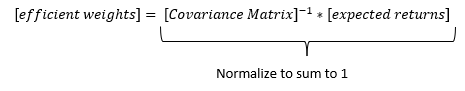

__Creating the inverse Covariance Matrix__ (beyond scope)

> The inverse essentially "__undoes__" the effects of covariances, allowing for the separation of the individual contributions of each asset to the portfolio's risk and return.

__What is the intuition beaynd?__
- The formula is: __`the inverse of coveriance matrix (of the assets) * the CAGR of each asset`__.
    - Ok, but why __do we multiply the inverse of the coveriance matrix (of the assets)?__
        - That's becase that the inverse of the covariance, is "remove/reduce" the effect of covariance between the assets, and that's make seperation between the contributions of each asset to the portfolio's risk & return. 
        - The point here, that its help up the found the "optimal" wegiths for reach the diversification effects.  

In [470]:
# This is the inverse of the covariance matrix
cov_matrix_inv = pd.DataFrame(np.linalg.pinv(cov_matrix.values), cov_matrix.columns, cov_matrix.index)

# Non-normelized inverse covariance
cov_matrix_inv

,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT
AAPL,24.703648,-0.901012,-0.642523,-0.728153,-1.041592,-16.317416,-1.524181,-2.353680
BA,-0.901012,7.953244,-2.418104,-2.290961,-3.741520,-0.243852,-0.615379,0.691553
DIS,-0.642523,-2.418104,19.630810,-1.083259,-6.454056,-3.465321,-0.210785,-0.647052
GE,-0.728153,-2.290961,-1.083259,8.988246,-4.262916,0.746583,-0.124580,0.271667
JPM,-1.041592,-3.741520,-6.454056,-4.262916,23.227737,-3.174145,0.498202,-1.797345
MSFT,-16.317416,-0.243852,-3.465321,0.746583,-3.174145,31.567045,-1.810685,-4.922284
TSLA,-1.524181,-0.615379,-0.210785,-0.124580,0.498202,-1.810685,3.309973,0.501830
WMT,-2.353680,0.691553,-0.647052,0.271667,-1.797345,-4.922284,0.501830,22.687697


In [471]:
# matrix multiplication between a matrix and its inverse matrix,
# gives identity matrix 
cov_matrix.dot(cov_matrix_inv) 

# ofcurse, matrix * its inverse = identity.

,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT
AAPL,1.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000
BA,0.000000,1.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
DIS,0.000000,0.000000,1.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000
GE,-0.000000,0.000000,-0.000000,1.000000,-0.000000,0.000000,-0.000000,-0.000000
JPM,-0.000000,0.000000,-0.000000,-0.000000,1.000000,0.000000,-0.000000,0.000000
MSFT,0.000000,0.000000,0.000000,-0.000000,-0.000000,1.000000,-0.000000,0.000000
TSLA,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,1.000000,0.000000
WMT,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,1.000000


In [472]:
# Now, for get the efficient weigths, we need to:
# inverse covariance matrix * compund annualize growth rate
w = cov_matrix_inv.dot(summary.CAGR) # see formula
w # non-normelized

AAPL    1.715916
BA     -0.804310
DIS    -1.792554
GE     -1.936901
JPM     1.084095
MSFT    2.886280
TSLA    1.019557
WMT     0.184120
dtype: float64

__Negative weigths = short position / sell the assets from the portfolio (rebalancing the portfolio)__

In [473]:
# normelized
optimal_weights = (w/w.sum()) # normalize to 1
optimal_weights

AAPL    0.728255
BA     -0.341359
DIS    -0.760781
GE     -0.822044
JPM     0.460103
MSFT    1.224971
TSLA    0.432712
WMT     0.078143
dtype: float64

In [441]:
#summary

In [442]:
# changing return inputs/assumptions
#summary.CAGR = summary.CAGR + np.array([0.02, 0.02, -0.02])
#summary

---

# Forward-looking Mean-Variance Optimization (MVO): Pitfalls

__typcial problems:__

- can lead to __short__ positions and positions __> 1__ (unbounded)
- will certainly lead to __concentrated__ portfolios (unbounded)
- highly dependent on & sensitive to __inputs/assumptions__ (return forecasts) -> GIGO
- small changes in forecasts (returns) lead to __large changes in weights__ (rebalancing costs!)
- __no guarantee__ that MVO-optimized Portfolio performs better than naive-diversified portfolio

__recap: bounded/contrained Optimization with Scipy__

In [474]:
import scipy.optimize as sco 

In [475]:
returns

,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT
Date,,,,,,,,
2017-07-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-05,0.004111,0.016214,-0.017030,-0.003643,0.010027,0.013349,-0.072401,-0.000531
2017-07-06,-0.009439,-0.001635,-0.021585,-0.038026,-0.003202,-0.007383,-0.055826,0.001992
2017-07-07,0.010159,0.004417,-0.000290,-0.006081,0.005033,0.012979,0.014215,-0.001855
2017-07-10,0.006104,0.007857,0.002613,-0.004206,-0.007032,0.007486,0.009035,-0.027877
...,...,...,...,...,...,...,...,...
2022-06-24,0.024517,0.056431,0.036903,0.046980,0.029846,0.034150,0.045249,0.000809
2022-06-27,0.000000,-0.019854,-0.011966,-0.005516,-0.008012,-0.010497,-0.003202,0.003233
2022-06-28,-0.029790,-0.000144,-0.007142,-0.012442,-0.004812,-0.031749,-0.050044,-0.014099


In [476]:
# Covariance matrix 
cov_matrix

,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT
AAPL,0.102866,0.067416,0.043946,0.047265,0.046183,0.071477,0.092623,0.026421
BA,0.067416,0.245827,0.082928,0.118994,0.095169,0.061479,0.102927,0.019042
DIS,0.043946,0.082928,0.094183,0.060511,0.058722,0.044061,0.056623,0.016952
GE,0.047265,0.118994,0.060511,0.186594,0.077749,0.041297,0.063457,0.014483
JPM,0.046183,0.095169,0.058722,0.077749,0.097524,0.045000,0.052689,0.018958
MSFT,0.071477,0.061479,0.044061,0.041297,0.045000,0.086547,0.085218,0.026760
TSLA,0.092623,0.102927,0.056623,0.063457,0.052689,0.085218,0.405398,0.021022
WMT,0.026421,0.019042,0.016952,0.014483,0.018958,0.026760,0.021022,0.053390


In [477]:
# Annualize risk/return
summary

,ann. Risk,CAGR
AAPL,0.320728,0.307632
BA,0.495809,-0.072108
DIS,0.306893,-0.025643
GE,0.431965,-0.213645
JPM,0.312289,0.039664
MSFT,0.294188,0.304624
TSLA,0.636709,0.572018
WMT,0.231063,0.100635


In [478]:
# Portfolio return based on a given
def port_ret(weights):
    cagr = summary.CAGR.dot(weights)
    return cagr

In [479]:
# Portfolio velatility based on a given wegiths
def port_vol(weights):
    risk = np.sqrt(weights.dot(cov_matrix).dot(weights))
    return risk

In [480]:
# minimuze Risk Adjusted Return (funrion to minimize by scipy)
def min_func_RaR(weights): 
     return -port_ret(weights) / port_vol(weights) 

In [481]:
# number of assets
noa = len(summary)
noa

8

In [482]:
# Initialize wegiths
eweigths = np.full(noa, 1/noa)
eweigths

array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])

In [483]:
# constraint: weights must sum up to 1 -> sum of weights - 1 = 0
cons = ({"type": "eq", "fun": lambda x: np.sum(x) - 1})

In [484]:
# bounds: all weights shall be between 0 and 1 -> can be changed
bnds =  tuple((0, 1) for x in range(noa))
bnds

((0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1))

In [485]:
# Make optimization
opts = sco.minimize(min_func_RaR, # function to minimize (minimize the Risk Adjusted Return)
                    eweigths, method = "SLSQP",  # optimization function
                    bounds = bnds,  # bonds (each weigths nust be between [0 1])
                    constraints= cons) # constraints: the sum of weights in a portfolio nust sum to one

In [486]:
opts
# x: the weigths for the optimal portfolio 

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -1.1559697758185041
       x: [ 2.279e-01  0.000e+00  5.149e-16  0.000e+00  0.000e+00
            5.230e-01  2.085e-01  4.059e-02]
     nit: 10
     jac: [-6.089e-05  1.102e+00  6.494e-01  1.273e+00  4.387e-01
           -1.541e-04  4.534e-04 -1.505e-06]
    nfev: 92
    njev: 10

In [487]:
optimal_weights = opts["x"]
optimal_weights

array([2.27896286e-01, 0.00000000e+00, 5.14874059e-16, 0.00000000e+00,
       0.00000000e+00, 5.23041474e-01, 2.08475683e-01, 4.05865571e-02])

In [488]:
# The optimal weights
pd.Series(data = optimal_weights, index = summary.index).sort_values(ascending = False).head(20)

MSFT   0.523041
AAPL   0.227896
TSLA   0.208476
WMT    0.040587
DIS    0.000000
BA     0.000000
GE     0.000000
JPM    0.000000
dtype: float64

In [489]:
cagr_opt = port_ret(optimal_weights)
cagr_opt # the Compuned Annualize growth rate of the optimal weigths. 

0.3527755285554861

In [490]:
vol_opt = port_vol(optimal_weights)
vol_opt # the annualize volatility (risk,std) of the optimal weigths.

0.30517712135310576

In [491]:
RaR_opt = -min_func_RaR(optimal_weights)
RaR_opt # the Rist Adjusted Return of the optimal weigths.  

1.1559697758185041

---

# Introduction of a Risk-Free Asset

> We can differentiate between risky assets and risk free assets, and the vast majority of assets are risky assets.

__Risky Assets__: Stocks, Corporate Bonds, Commodities, Cryptocurrencies, etc. (__volatility & uncertain outcomes__) <br>
__Risk-free Asset__: Short-Term Government Bond (USA, Germany): __known outcome__ (Coupon Rate / Yield)

In [492]:
# return of risk-free asset
rf = 0.03

In [493]:
# risk / standard deviation of risk-free asset
rfr = 0

In addition: Zero Correlation with risky assets.

Better metric for risk-adjusted return: __Sharpe Ratio__

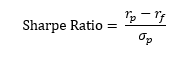

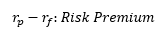

In [494]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.6f}'.format

In [495]:
df = pd.read_csv("stocks.csv", parse_dates = ["Date"], index_col = "Date")
df

,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT
Date,,,,,,,,
2017-07-03,35.875000,198.589996,107.459999,211.153839,92.750000,68.169998,23.507999,75.360001
2017-07-05,36.022499,201.809998,105.629997,210.384613,93.680000,69.080002,21.806000,75.320000
2017-07-06,35.682499,201.479996,103.349998,202.384613,93.379997,68.570000,20.588667,75.470001
2017-07-07,36.044998,202.369995,103.320000,201.153839,93.849998,69.459999,20.881332,75.330002
2017-07-10,36.264999,203.960007,103.589996,200.307693,93.190002,69.980003,21.070000,73.230003
...,...,...,...,...,...,...,...,...
2022-06-24,141.660004,141.529999,97.779999,67.080002,117.320000,267.700012,245.706665,123.720001
2022-06-27,141.660004,138.720001,96.610001,66.709999,116.379997,264.890015,244.919998,124.120003
2022-06-28,137.440002,138.699997,95.919998,65.879997,115.820000,256.480011,232.663330,122.370003


In [496]:
#assets = ["WMT", "AAPL", "MSFT"] # 3-Asset-Case
assets = df.columns

In [497]:
subset = df[assets].copy()
subset

,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT
Date,,,,,,,,
2017-07-03,35.875000,198.589996,107.459999,211.153839,92.750000,68.169998,23.507999,75.360001
2017-07-05,36.022499,201.809998,105.629997,210.384613,93.680000,69.080002,21.806000,75.320000
2017-07-06,35.682499,201.479996,103.349998,202.384613,93.379997,68.570000,20.588667,75.470001
2017-07-07,36.044998,202.369995,103.320000,201.153839,93.849998,69.459999,20.881332,75.330002
2017-07-10,36.264999,203.960007,103.589996,200.307693,93.190002,69.980003,21.070000,73.230003
...,...,...,...,...,...,...,...,...
2022-06-24,141.660004,141.529999,97.779999,67.080002,117.320000,267.700012,245.706665,123.720001
2022-06-27,141.660004,138.720001,96.610001,66.709999,116.379997,264.890015,244.919998,124.120003
2022-06-28,137.440002,138.699997,95.919998,65.879997,115.820000,256.480011,232.663330,122.370003


In [498]:
returns = subset.pct_change()
returns

,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT
Date,,,,,,,,
2017-07-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-05,0.004111,0.016214,-0.017030,-0.003643,0.010027,0.013349,-0.072401,-0.000531
2017-07-06,-0.009439,-0.001635,-0.021585,-0.038026,-0.003202,-0.007383,-0.055826,0.001992
2017-07-07,0.010159,0.004417,-0.000290,-0.006081,0.005033,0.012979,0.014215,-0.001855
2017-07-10,0.006104,0.007857,0.002613,-0.004206,-0.007032,0.007486,0.009035,-0.027877
...,...,...,...,...,...,...,...,...
2022-06-24,0.024517,0.056431,0.036903,0.046980,0.029846,0.034150,0.045249,0.000809
2022-06-27,0.000000,-0.019854,-0.011966,-0.005516,-0.008012,-0.010497,-0.003202,0.003233
2022-06-28,-0.029790,-0.000144,-0.007142,-0.012442,-0.004812,-0.031749,-0.050044,-0.014099


In [499]:
def ann_risk_return(returns_df): # assumes simple returns as input
    summary = pd.DataFrame(index = returns_df.columns)
    summary["ann. Risk"] = returns_df.std() * np.sqrt(252)
    log_returns = np.log(returns_df + 1)
    summary["CAGR"] = np.exp(log_returns.mean() * 252) - 1
    return summary

In [500]:
summary = ann_risk_return(returns)
summary

,ann. Risk,CAGR
AAPL,0.320728,0.307632
BA,0.495809,-0.072108
DIS,0.306893,-0.025643
GE,0.431965,-0.213645
JPM,0.312289,0.039664
MSFT,0.294188,0.304624
TSLA,0.636709,0.572018
WMT,0.231063,0.100635


In [501]:
# Sharpe ratio - is the ratio between `return` and `risk`
summary["Sharpe"] = (summary.CAGR - rf) / summary["ann. Risk"]
summary

,ann. Risk,CAGR,Sharpe
AAPL,0.320728,0.307632,0.865629
BA,0.495809,-0.072108,-0.205942
DIS,0.306893,-0.025643,-0.181310
GE,0.431965,-0.213645,-0.564039
JPM,0.312289,0.039664,0.030944
MSFT,0.294188,0.304624,0.933499
TSLA,0.636709,0.572018,0.851281
WMT,0.231063,0.100635,0.305697


In [502]:
# Covariance matrix
cov_matrix = returns.cov() * 252
cov_matrix

,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT
AAPL,0.102866,0.067416,0.043946,0.047265,0.046183,0.071477,0.092623,0.026421
BA,0.067416,0.245827,0.082928,0.118994,0.095169,0.061479,0.102927,0.019042
DIS,0.043946,0.082928,0.094183,0.060511,0.058722,0.044061,0.056623,0.016952
GE,0.047265,0.118994,0.060511,0.186594,0.077749,0.041297,0.063457,0.014483
JPM,0.046183,0.095169,0.058722,0.077749,0.097524,0.045000,0.052689,0.018958
MSFT,0.071477,0.061479,0.044061,0.041297,0.045000,0.086547,0.085218,0.026760
TSLA,0.092623,0.102927,0.056623,0.063457,0.052689,0.085218,0.405398,0.021022
WMT,0.026421,0.019042,0.016952,0.014483,0.018958,0.026760,0.021022,0.053390


In [503]:
noa = len(returns.columns) # number of assets
noa

8

In [504]:
nop = 1000000 # number of random portfolios
nop

1000000

In [505]:
np.random.seed(123)
matrix = np.random.random(noa * nop).reshape(nop, noa)

In [506]:
weights = matrix / matrix.sum(axis = 1, keepdims= True)
weights

array([[0.15243548, 0.06262702, 0.04965074, ..., 0.09260487, 0.21465883,
        0.14988797],
       [0.13435477, 0.10954328, 0.09587138, ..., 0.01667182, 0.111199  ,
        0.20616891],
       [0.04303407, 0.04137394, 0.12534715, ..., 0.20030773, 0.17083656,
        0.14408777],
       ...,
       [0.04582518, 0.04512184, 0.09193417, ..., 0.1181274 , 0.18458134,
        0.0772198 ],
       [0.03411367, 0.08455803, 0.0143559 , ..., 0.0267571 , 0.10701748,
        0.15780309],
       [0.01365812, 0.12680424, 0.08432166, ..., 0.20021175, 0.06270482,
        0.07983547]])

In [507]:
# portfolio return
port_ret = summary.CAGR.dot(weights.T)
port_ret

array([0.18765351, 0.08175535, 0.1594215 , ..., 0.11937983, 0.02880053,
       0.05915579])

In [508]:
# portfolio risk
port_risk = np.sqrt((weights.dot(cov_matrix) * weights).sum(axis = 1))
port_risk

array([0.27389316, 0.25536191, 0.25796314, ..., 0.27940527, 0.27871561,
       0.26940265])

In [509]:
# compute the sharp ratio of each portfolio 
sharpe_ratio = (port_ret - rf) / port_risk
sharpe_ratio

array([ 0.57560221,  0.20267452,  0.5017054 , ...,  0.31989315,
       -0.00430356,  0.10822386])

In [510]:
sharpe_ratio.min()

-0.4245189176812934

In [511]:
sharpe_ratio.max()

1.0037460652047463

In [512]:
# risk free asset
# rfr -> risk free return (0)
# rf -> return free (0.3)
summary.loc["Rf"] = [rfr, rf, np.nan]

In [513]:
summary
# annualize risk | Compund Annnualize Growth rate | Sharp ratio 

,ann. Risk,CAGR,Sharpe
AAPL,0.320728,0.307632,0.865629
BA,0.495809,-0.072108,-0.205942
DIS,0.306893,-0.025643,-0.181310
GE,0.431965,-0.213645,-0.564039
JPM,0.312289,0.039664,0.030944
MSFT,0.294188,0.304624,0.933499
TSLA,0.636709,0.572018,0.851281
WMT,0.231063,0.100635,0.305697
Rf,0.000000,0.030000,NaN


__Plot all the 100000 random weigths portfolios__

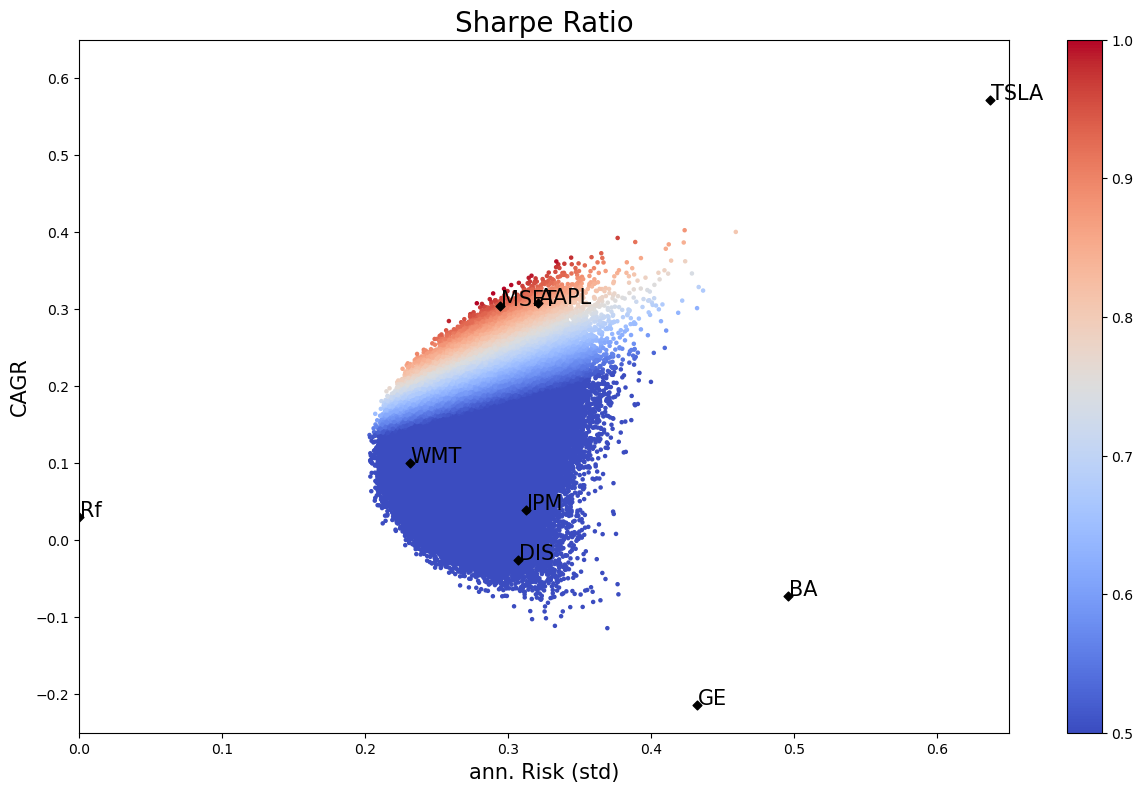

In [514]:
plt.figure(figsize = (15, 9))
plt.scatter(port_risk, port_ret, s= 5, c = sharpe_ratio, cmap = "coolwarm", vmin = 0.5, vmax = 1)
plt.colorbar()
plt.scatter(summary.loc[:, "ann. Risk"], summary.loc[:, "CAGR"], s= 20, c = "black", marker = "D")
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "ann. Risk"]+0.0005, summary.loc[i, "CAGR"]+0.0005), size = 15)
plt.xlim(0, 0.65)
plt.ylim(-0.25, 0.65)
plt.xlabel("ann. Risk (std)", fontsize = 15)
plt.ylabel("CAGR", fontsize = 15)
plt.title("Sharpe Ratio", fontsize = 20)
plt.show()

## The Sharpe Ratio: Graphical Interpretation

__Example: Sharpe Ratio MSFT__

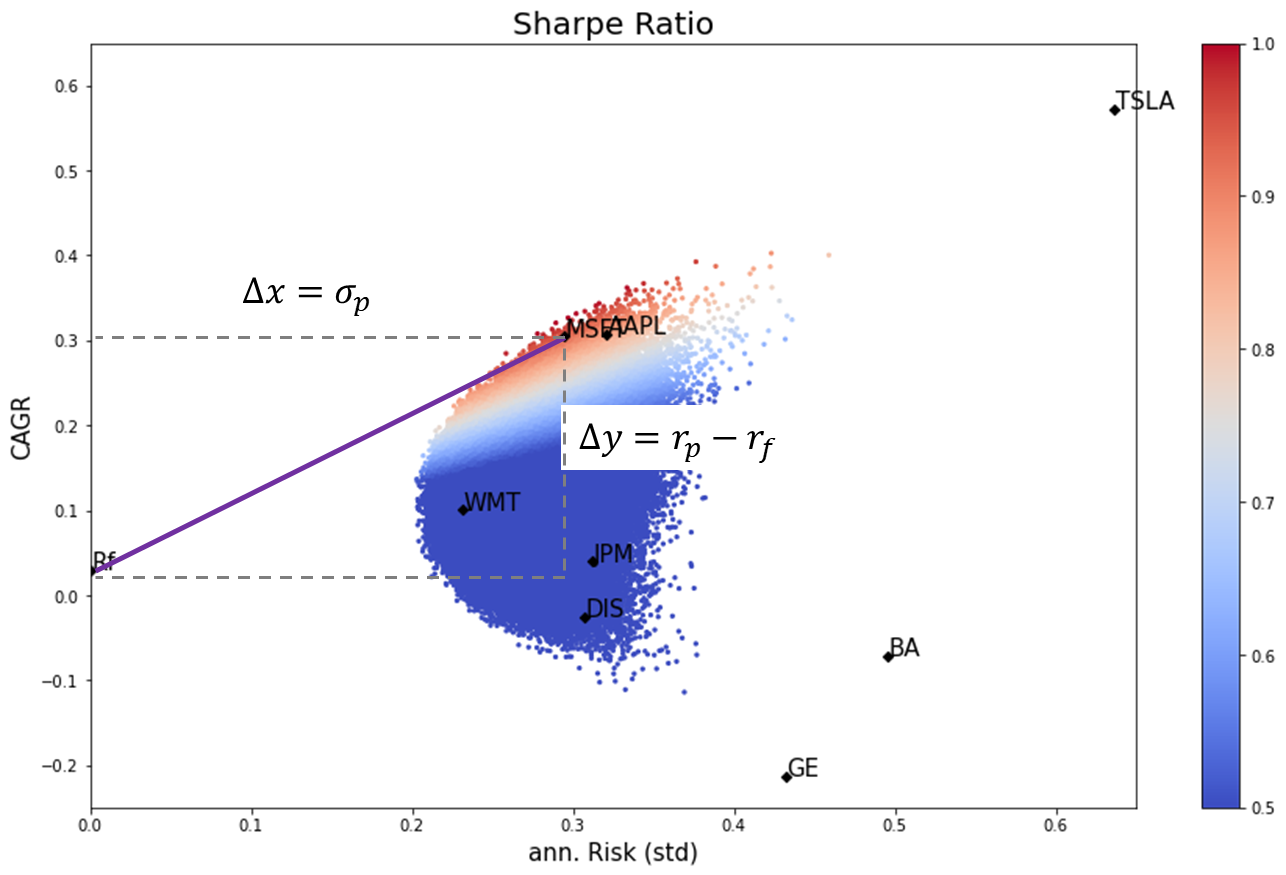

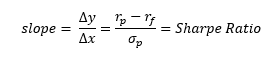

-> The __Sharpe Ratio__ of an Asset/Portfolio can be interpreted as the __Slope__ of the straight line connecting the __Asset/Portfolio with the Risk-free Asset__.

----

# Portfolio Optimization with Risk-free Asset (Part 1)

__Portfolio Optimization__: Finding the Portfolio with the __highest Sharpe Ratio__

__Graphical Solution__: Drawing a Tangency line from Risk-Free Asset to Efficient Frontier -> __Tangency Portfolio__

In [515]:
import scipy.optimize as sco

In [516]:
summary.drop(index = "Rf", inplace = True)
summary

,ann. Risk,CAGR,Sharpe
AAPL,0.320728,0.307632,0.865629
BA,0.495809,-0.072108,-0.205942
DIS,0.306893,-0.025643,-0.181310
GE,0.431965,-0.213645,-0.564039
JPM,0.312289,0.039664,0.030944
MSFT,0.294188,0.304624,0.933499
TSLA,0.636709,0.572018,0.851281
WMT,0.231063,0.100635,0.305697


In [517]:
# Portfolio return
def port_ret(weights):
    cagr = summary.CAGR.dot(weights)
    return cagr

In [518]:
# Portfolio volatility
def port_vol(weights):
    risk = np.sqrt(weights.dot(cov_matrix).dot(weights))
    return risk

In [519]:
# Sharp ratio
def sharpe(weights): 
     return -(port_ret(weights)-rf) / port_vol(weights) 

In [520]:
# Number of assetes
noa = len(summary)
noa

8

In [521]:
# initial weigths
eweigths = np.full(noa, 1/noa)
eweigths

array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])

__Efficient Frontier__

In [522]:
# portfolio return == tcagr

# By those constrains, w'll fund the optimal weigths for a
# specific level target return
cons = (
    
    # the portfolio return nust be equal to the target return level that we define! 
    {"type": "eq", "fun": lambda x: port_ret(x)-tcagr},

    # sum of weigths must sum to 1.
    {"type": "eq", "fun": lambda x: np.sum(x) -1}
) 

In [523]:
# Create 500 target return
# it's a linear range between CAGR.min - CAGR.max
tcagrs = np.linspace(summary.CAGR.min(), summary.CAGR.max(), 500)
tcagrs

array([-2.13645015e-01, -2.12070540e-01, -2.10496065e-01, -2.08921589e-01,
       -2.07347114e-01, -2.05772639e-01, -2.04198163e-01, -2.02623688e-01,
       -2.01049212e-01, -1.99474737e-01, -1.97900262e-01, -1.96325786e-01,
       -1.94751311e-01, -1.93176835e-01, -1.91602360e-01, -1.90027885e-01,
       -1.88453409e-01, -1.86878934e-01, -1.85304458e-01, -1.83729983e-01,
       -1.82155508e-01, -1.80581032e-01, -1.79006557e-01, -1.77432082e-01,
       -1.75857606e-01, -1.74283131e-01, -1.72708655e-01, -1.71134180e-01,
       -1.69559705e-01, -1.67985229e-01, -1.66410754e-01, -1.64836278e-01,
       -1.63261803e-01, -1.61687328e-01, -1.60112852e-01, -1.58538377e-01,
       -1.56963901e-01, -1.55389426e-01, -1.53814951e-01, -1.52240475e-01,
       -1.50666000e-01, -1.49091524e-01, -1.47517049e-01, -1.45942574e-01,
       -1.44368098e-01, -1.42793623e-01, -1.41219148e-01, -1.39644672e-01,
       -1.38070197e-01, -1.36495721e-01, -1.34921246e-01, -1.33346771e-01,
       -1.31772295e-01, -

In [524]:
bnds =  tuple((0, 1) for x in range(noa))
bnds

((0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1))

In [525]:
vols = []

In [526]:
# for each target return, find the portfolio with the lowest volatility
for tcagr in tcagrs:
    res = sco.minimize(port_vol, # function to minimize (portfolio risk (std))
                       eweigths, # initial weigths (starting points)
                       method = "SLSQP", # optimizer
                       bounds = bnds, # bounds (weigths can be between [0 1])
                       constraints= cons) # the constraints
    vols.append(res["fun"])

vols = np.array(vols)

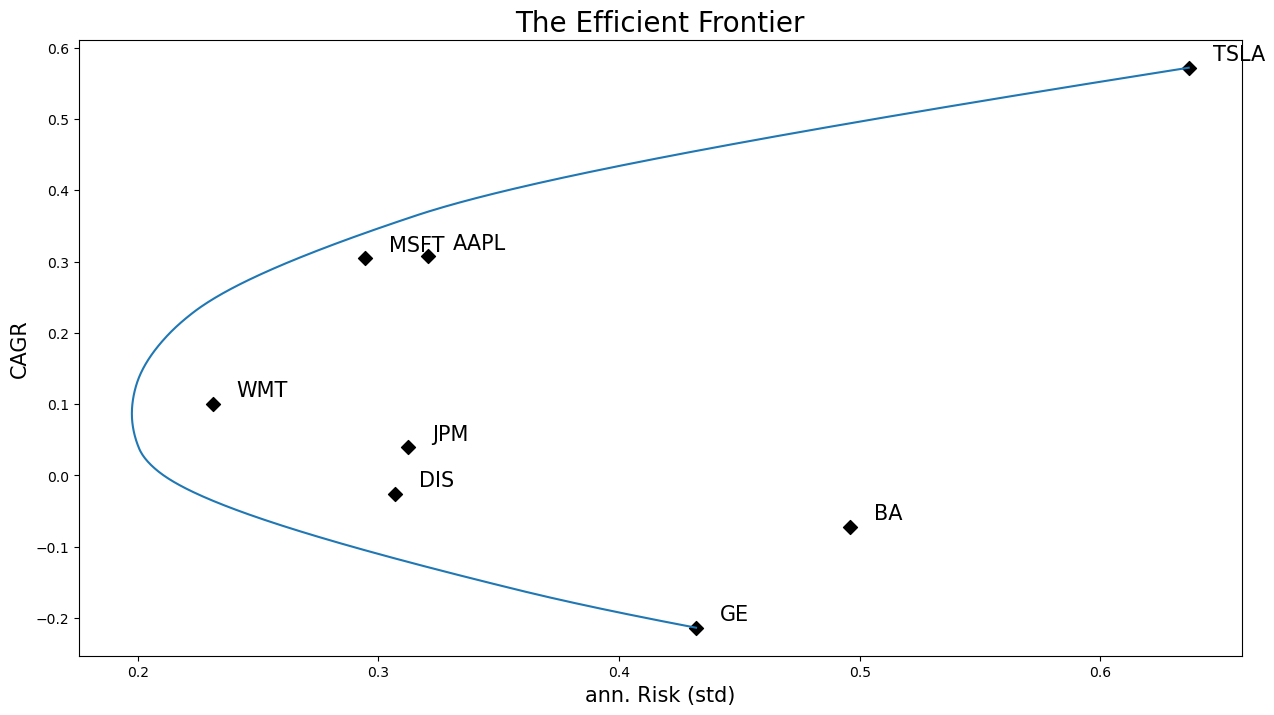

In [527]:
plt.figure(figsize = (15, 8))
plt.scatter(summary.loc[:, "ann. Risk"], summary.loc[:, "CAGR"],s= 50, marker = "D", c = "black")
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "ann. Risk"]+0.01, summary.loc[i, "CAGR"]+0.01), size = 15)
plt.plot(vols, tcagrs)
plt.xlabel("ann. Risk (std)", fontsize = 15)
plt.ylabel("CAGR", fontsize = 15)
plt.title("The Efficient Frontier", fontsize = 20)
plt.show()

---

# Portfolio Optimization with Risk-free Asset (Part 2)

__Optimization (max Sharpe Ratio)__
- Let's find the tengency line!

In [528]:
#constraint: weights must sum up to 1 -> sum of weights - 1 = 0
cons = ({"type": "eq", "fun": lambda x: np.sum(x) - 1})

In [529]:
# Now, what we want to minimize (optimize)?
# The sharp ratio function! we want to find the best shrp ratio 
# across all the portfolios!
opts = sco.minimize(sharpe, # function to miminize - sharp ratio function
                     eweigths,  
                     method = "SLSQP", 
                     bounds = bnds, 
                     constraints= cons)

In [530]:
opts

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -1.0607315439718041
       x: [ 2.283e-01  5.034e-16  0.000e+00  0.000e+00  0.000e+00
            5.331e-01  2.386e-01  0.000e+00]
     nit: 9
     jac: [-9.372e-02  9.803e-01  5.683e-01  1.166e+00  3.648e-01
           -9.366e-02 -9.435e-02 -5.207e-02]
    nfev: 83
    njev: 9

In [531]:
optimal_weights = opts["x"]
optimal_weights

array([2.28292605e-01, 5.03395069e-16, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.33072984e-01, 2.38634411e-01, 0.00000000e+00])

In [532]:
pd.Series(data = optimal_weights, index = summary.index).sort_values(ascending = False).head(20)

MSFT   0.533073
TSLA   0.238634
AAPL   0.228293
BA     0.000000
DIS    0.000000
GE     0.000000
JPM    0.000000
WMT    0.000000
dtype: float64

In [533]:
cagr_opt = port_ret(optimal_weights)
cagr_opt

0.3691201948988754

In [534]:
vol_opt = port_vol(optimal_weights)
vol_opt

0.31970407293543224

In [535]:
sharpe_opt = -sharpe(optimal_weights)
sharpe_opt 

1.0607315439718041

__Plot the Sharp Ratio__
- Its also called the capital market line

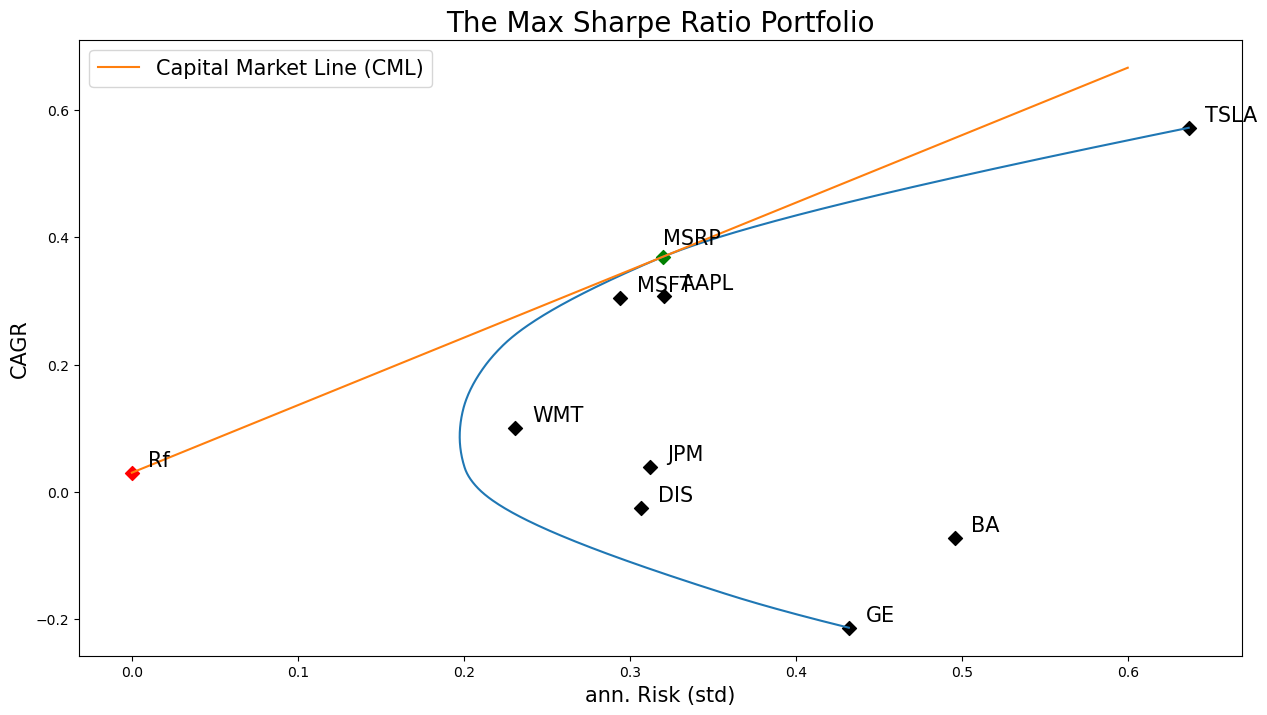

In [536]:
plt.figure(figsize = (15, 8))
plt.scatter(summary.loc[:, "ann. Risk"], summary.loc[:, "CAGR"],s= 50, marker = "D", c = "black")
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "ann. Risk"]+0.01, summary.loc[i, "CAGR"]+0.01), size = 15)
plt.plot(vols, tcagrs)
plt.scatter(rfr, rf, s= 50, marker = "D", c = "red")
plt.annotate("Rf", xy= (rfr+0.01, rf+0.01), size = 15)
plt.scatter(vol_opt, cagr_opt, s= 50, marker = "D", c = "green")
plt.annotate("MSRP", xy= (vol_opt+0.0, cagr_opt+0.02), size = 15)
plt.plot(np.array([0, 0.6]), rf+sharpe_opt*np.array([0, 0.6]), label = "Capital Market Line (CML)")
plt.xlabel("ann. Risk (std)", fontsize = 15)
plt.ylabel("CAGR", fontsize = 15)
plt.title("The Max Sharpe Ratio Portfolio", fontsize = 20)
plt.legend(fontsize = 15)
plt.show()

__(Unbounded) Optimization with Linear Algebra__:
* Unbounded meaning that the weigths can be between -1 to 1

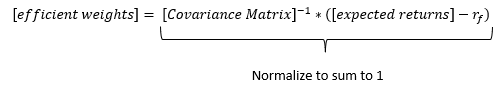

## Implications and the Two-Fund-Theorem

If __all risky assets__ (that exist) are included:

- __Capital Market Line (CML)__ is the new __Efficient Frontier__ with all efficient Portfolios. 
- -> The __MSRP__ is the only __efficient risky Portfolio__. 
- -> __CML__ can be interpreted as set of __Portfolios consisting of Rf and MSRP__
- -> Every Investor should hold a __combination of Rf and MSRP__ (Two-Fund-Theorem).
- -> MSRP also called __Market Portfolio__ (MP). 

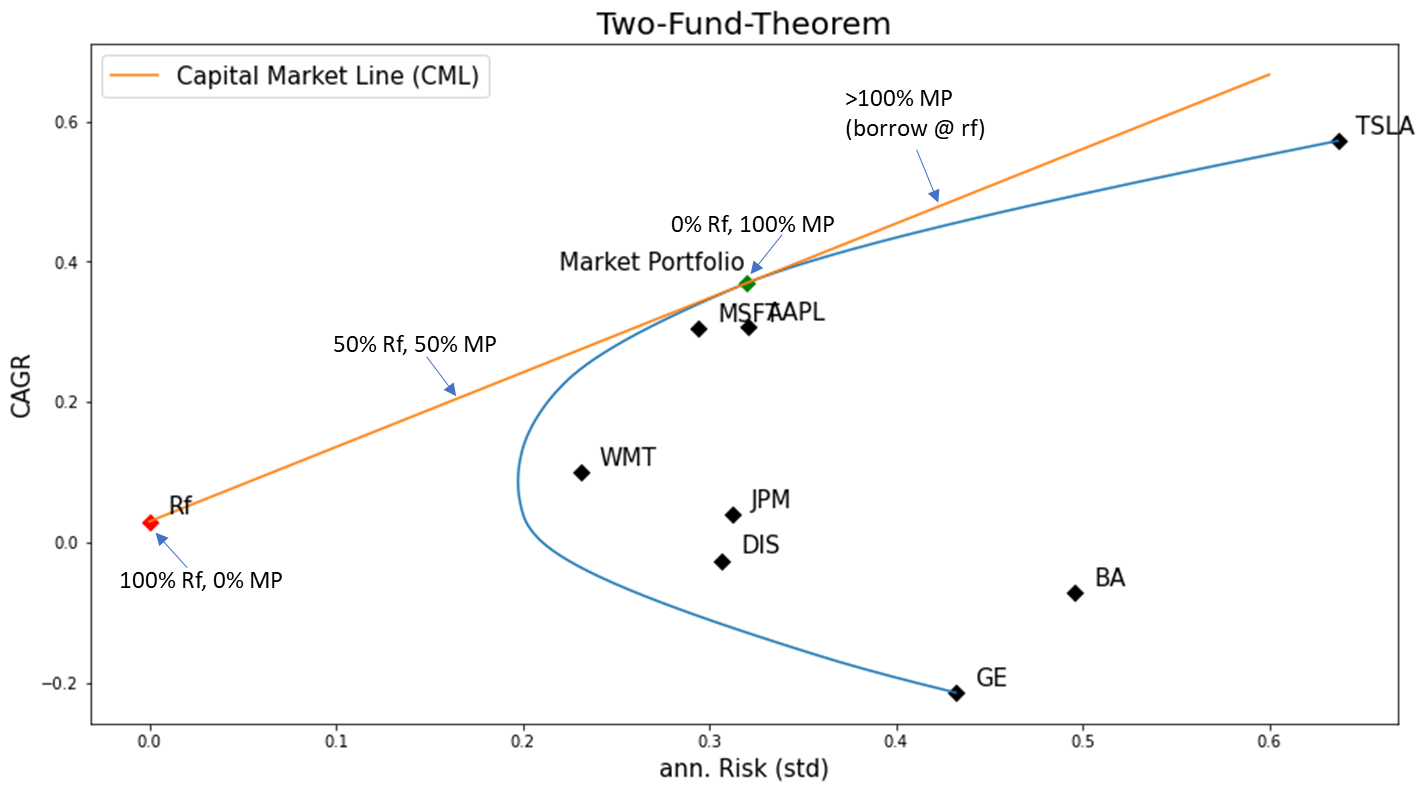